# DATA MINING & STORYTELLING - SERIE A  (2005-2019)

----


In questo notebook applicheremo diverse tecniche di **data cleaning**, **data visualization**, **feature selection** e **feature engineering** al dataset della Serie A. 

# Get the data

---




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

Importiamo il dataset e diamo una prima occhiata...


In [3]:
df1 = pd.read_csv('data/serie_a.csv', sep=';')
df1.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,27/08/05,Fiorentina,Sampdoria,2,1,H,2.0,0.0,H,15.0,9.0,9.0,4.0,18.0,23.0,9.0,3.0,1.0,4.0,0.0,0.0,2.20,2.87,3.25,2.25,2.9,3.2,2.20,2.8,3.1,2.20,2.80,3.20,2.25,2.90,3.4,2.25,2.87,3.00,2.20,2.90,3.10,50.0,2.35,2.21,3.00,2.89,3.7,3.32,34.0,2.30,2.03,1.75,1.66,16.0,-0.25,2.00,1.95,1.96,1.92,NaN,NaN,NaN
1,I1,27/08/05,Livorno,Lecce,2,1,H,1.0,1.0,D,17.0,6.0,7.0,5.0,27.0,21.0,9.0,2.0,2.0,3.0,0.0,0.0,1.90,2.90,4.00,1.90,3.2,3.8,1.90,3.0,3.6,1.91,3.00,3.75,1.95,3.00,4.2,1.90,2.87,4.00,1.90,3.00,3.75,51.0,2.00,1.92,3.20,3.04,4.5,3.95,34.0,2.00,1.85,2.00,1.84,17.0,-0.50,2.00,1.96,1.95,1.89,NaN,NaN,NaN
2,I1,28/08/05,Ascoli,Milan,1,1,D,0.0,0.0,D,8.0,16.0,3.0,9.0,22.0,16.0,0.0,5.0,2.0,1.0,0.0,0.0,7.50,3.75,1.40,9.00,4.5,1.3,6.50,3.7,1.4,8.00,3.75,1.36,10.00,4.75,1.3,8.00,3.75,1.36,8.50,3.75,1.35,50.0,12.00,8.97,4.70,4.09,1.4,1.34,32.0,1.90,1.78,2.05,1.89,15.0,1.25,2.10,2.05,1.86,1.82,NaN,NaN,NaN
3,I1,28/08/05,Inter,Treviso,3,0,H,1.0,0.0,H,16.0,7.0,9.0,3.0,13.0,20.0,6.0,1.0,1.0,3.0,0.0,0.0,1.16,5.50,13.00,1.16,5.9,15.0,1.17,5.5,11.0,1.17,5.50,12.00,1.17,5.75,15.0,1.16,5.00,15.00,1.17,5.50,12.00,50.0,1.20,1.17,6.50,5.55,18.0,14.23,30.0,1.65,1.55,2.40,2.23,15.0,-1.75,1.95,1.90,2.01,1.97,NaN,NaN,NaN
4,I1,28/08/05,Juventus,Chievo,1,0,H,1.0,0.0,H,16.0,2.0,7.0,0.0,16.0,12.0,6.0,2.0,1.0,2.0,0.0,0.0,1.25,5.00,13.00,1.22,5.5,10.0,1.20,5.0,10.0,1.20,5.00,11.00,1.22,5.50,12.0,1.22,5.00,9.50,1.22,5.00,10.00,51.0,1.25,1.21,5.96,5.15,16.0,12.18,33.0,1.85,1.71,2.10,1.96,15.0,-1.50,1.90,1.87,2.07,1.98,NaN,NaN,NaN


Possiamo già notare la presenza di dati mancanti. Ci occuperemo di questo in seguito.

Procediamo con la descrizione del dataset.


Il dataset presenta __64__ attributi:

1. __Div__ = League Division
2. __Date__ = Match Date (dd/mm/yy)
3. __HomeTeam__ = Home Team
4. __AwayTeam__ = Away Team
5. __FTHG__ = Full Time Home Team Goals
6. __FTAG__ = Full Time Away Team Goals
7. __FTR__ = Full Time Result (H=Home Win, D=Draw, A=Away Win)
8. __HTHG__ = Half Time Home Team Goals
9. __HTAG__ = Half Time Away Team Goals
10. __HTR__ = Half Time Result (H=Home Win, D=Draw, A=Away Win)
11. __HS__ = Home Team Shots
12. __AS__ = Away Team Shots
13. __HST__ = Home Team Shots on Target
14. __AST__ = Away Team Shots on Target
15. __HF__ = Home Team Fouls Committed
16. __AF__ = Away Team Fouls Committed
17. __HC__ = Home Team Corners
18. __AC__ = Away Team Corners
19. __HY__ = Home Team Yellow Cards
20. __AY__ = Away Team Yellow Cards
21. __HR__ = Home Team Red Cards
22. __AR__ = Away Team Red Cards
23. __B365H/D/A__ = Bet365 home/away/draw win odds
24. __BSH/D/A__ = Blue Square home/away/draw win odds
25. __BWH/D/A__ = Bet&Win home/away/draw win odds
26. __IWH/D/A__ = Interwetten home/away/draw win odds
27. __LBH/D/A__ = Ladbrokes home/away/draw win odds
28. __PSH/D/A__ and PH = Pinnacle home/away/draw win odds
29. __WHH/D/A__ = William Hill home/away/draw win odds
30. __VCH/D/A__ = VC Bet home/away/draw win odds
31. __Bb1X2__ = Number of BetBrain bookmakers used to calculate match odds averages and maximums
32. __BbMxH__ = Betbrain maximum home win odds
33. __BbAvH__ = Betbrain average home win odds
34. __BbMxD__ = Betbrain maximum draw odds
35. __BbAvD__ = Betbrain average draw win odds
36. __BbMxA__ = Betbrain maximum away win odds
37. __BbAvA__ = Betbrain average away win odds
38. __BbOU__ = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums
39. __BbMx>2.5__ = Betbrain maximum over 2.5 goals
40. __BbAv>2.5__ = Betbrain average over 2.5 goals
41. __BbMx<2.5__ = Betbrain maximum under 2.5 goals
42. __BbAv<2.5__ = Betbrain average under 2.5 goals
43. __BbAH__ = Number of BetBrain bookmakers used to Asian handicap averages and maximums
44. __BbAHh__ = Betbrain size of handicap (home team)
45. __BbMxAHH__ = Betbrain maximum Asian handicap home team odds
46. __BbAvAHH__ = Betbrain average Asian handicap home team odds
47. __BbMxAHA__ = Betbrain maximum Asian handicap away team odds
48. __BbAvAHA__ = Betbrain average Asian handicap away team odds
49. __PSCH/D/A__ = Avarage Closing home/draw/away odds


---


# Data Preparation

---


In questa sezione ci occuperemo del __data cleaning__ e apporteremo delle prime modifiche per proseguire con le statistiche sui dati.


---

In [4]:
df1.shape

(5320, 64)

Il dataset contiene 5320 record di partite dal 08/2005 al 05/2019.


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       5320 non-null   object 
 1   Date      5320 non-null   object 
 2   HomeTeam  5320 non-null   object 
 3   AwayTeam  5320 non-null   object 
 4   FTHG      5320 non-null   int64  
 5   FTAG      5320 non-null   int64  
 6   FTR       5320 non-null   object 
 7   HTHG      5318 non-null   float64
 8   HTAG      5318 non-null   float64
 9   HTR       5318 non-null   object 
 10  HS        5305 non-null   float64
 11  AS        5305 non-null   float64
 12  HST       5305 non-null   float64
 13  AST       5305 non-null   float64
 14  HF        5309 non-null   float64
 15  AF        5309 non-null   float64
 16  HC        5309 non-null   float64
 17  AC        5309 non-null   float64
 18  HY        5318 non-null   float64
 19  AY        5319 non-null   float64
 20  HR        5319 non-null   floa

Alcuni attributi contengono valori nulli. Vediamo quali di questi conviene ignorare:

### Handling with missing values

In [6]:
pd.set_option("max_columns",64)
pd.DataFrame(df1.isnull().sum()/df1.shape[0]).T

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000376,0.000376,0.000376,0.00282,0.00282,0.00282,0.00282,0.002068,0.002068,0.002068,0.002068,0.000376,0.000188,0.000188,0.000188,0.00094,0.00094,0.00094,0.003383,0.003383,0.003383,0.005639,0.005639,0.005639,0.075376,0.075376,0.075376,0.081955,0.081955,0.081955,0.020865,0.020865,0.020865,0.011654,0.011654,0.011654,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,0.500376,0.500376,0.500376


Come ci aspettiamo, gli ultimi 3 attributi (PSCH, PSCD e PSCA) sono nulli per circa la metà dei record, tuttavia possono contenere informazioni interessanti dal momento che descrivono le quote medie alla chiusura. Per il momento la nostra analisi non riguarda questi 3 attributi, tuttavia preferiamo lasciarli per utilizzarli in seguito.


Invece, ci sembra sia rilevante la presenza di valori nulli per i seguenti attributi: LBH/S/A, PSH/D/A e WHH/D/A, ovvero le quote di Ladbrokers, Pinnacle, William Hill e, di meno, VC bet. Questi campi nulli potrebbero influenzare in maniera erronea la nostra analisi, per cui preferiamo ignorarli. Ci rimangono comunque abbastanza informazioni sulle quote di altri bookmakers. Inoltre, abbiamo anche a disposizione una media già calcolata delle quote su un sostanzioso numero di bookmakers. 

In [7]:
#creiamo una copia del dataset su cui lavorare
df = df1.copy()
#droppiamo eventuali record interamente nulli
df.dropna(axis = 0, how = 'all')
#droppiamo gli attributi rilevati pocanzi
todrop = ['LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']
df = df.drop(todrop, axis=1)
df.shape

(5320, 52)

Non erano presenti record nulli. Abbiamo invece ridotto il numero di attributi a 52. 

Per lavorare con meno attributi, possiamo scegliere anche un altro gruppo di colonne da droppare che momentaneamente non interessano la nostra analisi. Si tratta delle quote sull'handicap asiatico. Eliminiamo quindi anche le seguenti colonne:

In [8]:
todrop = ['BbAH','BbAHh','BbMxAHH', 'BbMxAHA', 'BbAvAHA']
df = df.drop(todrop, axis=1)

#rimuoviamo anche la colonna DIV perché non serve
df = df.drop('Div', axis=1)
df.shape

(5320, 46)

Lavoriamo in totale con 45 attributi. Vediamo delle statistiche di base sugli attributi numerici:

In [10]:
pd.set_option("max_columns",45)
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAvAHH,PSCH,PSCD,PSCA
count,5320.000000,5320.000000,5318.000000,5318.000000,5305.000000,5305.000000,5305.000000,5305.000000,5309.000000,5309.000000,5309.000000,5309.000000,5318.000000,5319.000000,5319.000000,5319.000000,5315.000000,5315.000000,5315.000000,5302.000000,5302.000000,5302.000000,5290.000000,5290.000000,5290.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5319.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,2658.000000,2658.000000,2658.000000
mean,1.504887,1.133647,0.671305,0.486085,13.929500,11.358341,5.096513,4.033365,15.865323,16.191750,5.794500,4.602185,2.099285,2.371498,0.125400,0.172401,2.606672,3.663268,4.739614,2.571316,3.634296,4.590417,2.474958,3.570888,4.282786,41.514382,2.806522,2.582106,3.897479,3.630852,5.401857,4.649351,34.531027,2.044788,1.939372,1.975696,1.877800,1.917937,2.872664,4.076859,5.221701
std,1.227916,1.098460,0.823009,0.708697,5.332985,4.613774,2.574259,2.275645,5.091860,5.167882,2.990465,2.611919,1.274124,1.323971,0.354246,0.413415,1.659138,0.955600,3.451152,1.612171,0.962019,3.235260,1.392557,0.845924,2.854268,7.320764,2.011953,1.608318,1.142830,0.939815,4.489422,3.321305,6.339027,0.254950,0.225694,0.322036,0.284923,0.229922,2.119156,1.269019,4.671647
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,1.400000,1.100000,1.050000,1.450000,1.100000,1.050000,1.500000,1.100000,3.000000,1.060000,1.050000,1.330000,1.290000,1.130000,1.100000,4.000000,1.210000,1.180000,1.500000,1.470000,1.040000,1.060000,2.200000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,12.000000,13.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.100000,2.500000,1.650000,3.100000,2.500000,1.650000,3.100000,2.500000,37.000000,1.710000,1.650000,3.290000,3.130000,2.650000,2.520000,31.000000,1.870000,1.790000,1.760000,1.690000,1.820000,1.640000,3.350000,2.420000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,15.000000,16.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.100000,3.390000,3.600000,2.100000,3.300000,3.550000,2.100000,3.300000,3.400000,40.000000,2.240000,2.130000,3.500000,3.320000,4.000000,3.600000,34.000000,2.070000,1.970000,1.890000,1.800000,1.920000,2.220000,3.610000,3.700000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,7.000000,5.000000,19.000000,19.000000,8.000000,6.000000,3.000000,3.000000,0.000000,0.000000,2.900000,3.800000,5.500000,2.850000,3.800000,5.500000,2.750000,3.700000,5.000000,46.000000,3.100000,2.880000,4.050000,3.790000,6.365000,5.550000,38.000000,2.220000,2.100000,2.100000,1.990000,2.030000,3.237500,4.320000,6.180000
max,7.000000,7.000000,5.000000,5.000000,39.000000,34.000000,18.000000,14.000000,48.000000,41.000000,21.000000,19.000000,7.000000,8.000000,3.000000,3.000000,21.000000,15.000000,34.000000,21.000000,14.000000,41.000000,16.000000,13.000000,36.000000,77.000000,35.000000,18.590000,19.000000,14.430000,61.000000,37.940000,50.000000,2.710000,2.570000,5.400000,4.670000,5.240000,21.940000,17.000000,50.000000


Abbiamo:
* una media superiore per le squadre che giocano in casa per quanto riguarda i gol (1.5 contro 1.13 totali, 0.67 contro 0.48 nel primo tempo) e per il numero di corner concessi 
* una media superiore per chi gioca fuori casa per quanto riguarda falli e cartellini gialli e rossi
* Bet365 è il bookmaker con le quote minime più alte
* e molto altro... Faremo in seguito alcune statistiche generali sul dataset

---

### New feature - Season

Vorremmo arricchire il dataset in modo da renderlo suitable per analisi ad hoc. 

Per prima cosa, abbiamo bisogno di un campo __Season__ che, per ogni match, indichi la stagione di appartenenza. Questo campo permetterà di effettuare delle group by e semplificherà quindi la nostra analisi, dal momento che raggruppare i match e le squadre in base alla data è più dispendioso.

Abbiamo visto in precedenza che l'attributo Date è un _object_, abbiamo invece bisogno che sia una data vera e propria:

In [11]:
df["Date"] = pd.to_datetime(df.Date)

df.info(verbose=False)
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Columns: 46 entries, Date to PSCA
dtypes: datetime64[ns](1), float64(39), int64(2), object(4)
memory usage: 1.9+ MB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,...,BWH,BWD,BWA,IWH,IWD,IWA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAvAHH,PSCH,PSCD,PSCA
0,2005-08-27,Fiorentina,Sampdoria,2,1,H,2.0,0.0,H,15.0,9.0,9.0,4.0,18.0,23.0,9.0,3.0,1.0,4.0,0.0,0.0,2.2,...,2.25,2.9,3.2,2.2,2.8,3.1,50.0,2.35,2.21,3.0,2.89,3.7,3.32,34.0,2.3,2.03,1.75,1.66,1.95,NaN,NaN,NaN
1,2005-08-27,Livorno,Lecce,2,1,H,1.0,1.0,D,17.0,6.0,7.0,5.0,27.0,21.0,9.0,2.0,2.0,3.0,0.0,0.0,1.9,...,1.90,3.2,3.8,1.9,3.0,3.6,51.0,2.00,1.92,3.2,3.04,4.5,3.95,34.0,2.0,1.85,2.00,1.84,1.96,NaN,NaN,NaN


Creiamo il nuovo campo:

In [12]:
df["Season"] = ' '

In [13]:
#tot stagioni = 14 -> 5320/14=380
#in ogni campionato vengono giocate 380 partite in totale

df.loc[:380,'Season'] = '2005/2006'
df.loc[380:760,'Season'] = '2006/2007'
df.loc[760:1140,'Season'] = '2007/2008'
df.loc[1140:1520,'Season'] = '2008/2009'
df.loc[1520:1900,'Season'] = '2009/2010'
df.loc[1900:2280,'Season'] = '2010/2011'
df.loc[2280:2660,'Season'] = '2011/2012'
df.loc[2660:3040,'Season'] = '2012/2013'
df.loc[3040:3420,'Season'] = '2013/2014'
df.loc[3420:3800,'Season'] = '2014/2015'
df.loc[3800:4180,'Season'] = '2015/2016'
df.loc[4180:4560,'Season'] = '2016/2017'
df.loc[4560:4940,'Season'] = '2017/2018'
df.loc[4940:,'Season'] = '2018/2019'


In [14]:
campionati = df.groupby(df['Season'])

#stampo la prima partita per campionato
campionati.first()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,...,BWH,BWD,BWA,IWH,IWD,IWA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAvAHH,PSCH,PSCD,PSCA
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005/2006,2005-08-27,Fiorentina,Sampdoria,2,1,H,2.0,0.0,H,15.0,9.0,9.0,4.0,18.0,23.0,9.0,3.0,1.0,4.0,0.0,0.0,2.20,...,2.25,2.90,3.20,2.20,2.8,3.10,50.0,2.35,2.21,3.00,2.89,3.70,3.32,34.0,2.30,2.03,1.75,1.66,1.95,NaN,NaN,NaN
2006/2007,2006-09-09,Fiorentina,Inter,2,3,A,0.0,2.0,A,10.0,9.0,8.0,5.0,26.0,24.0,6.0,2.0,3.0,1.0,0.0,0.0,3.25,...,3.05,2.85,2.40,3.00,2.8,2.40,39.0,3.25,2.98,3.15,2.96,2.50,2.38,24.0,2.00,1.88,1.90,1.81,2.10,NaN,NaN,NaN
2007/2008,2007-08-25,Juventus,Livorno,5,1,H,1.0,0.0,H,21.0,10.0,9.0,3.0,24.0,13.0,5.0,5.0,3.0,3.0,0.0,0.0,1.33,...,1.30,4.50,9.00,1.30,4.4,8.50,37.0,1.40,1.33,5.00,4.31,12.63,9.27,27.0,2.02,1.92,1.92,1.83,1.86,NaN,NaN,NaN
2008/2009,2008-08-30,Sampdoria,Inter,1,1,D,0.0,1.0,A,18.0,15.0,3.0,4.0,19.0,20.0,9.0,8.0,2.0,2.0,0.0,0.0,4.33,...,4.50,3.15,1.80,4.20,3.0,1.85,40.0,4.93,4.25,3.25,3.11,1.99,1.89,30.0,2.17,2.00,1.83,1.74,1.92,NaN,NaN,NaN
2009/2010,2009-08-22,Bologna,Fiorentina,1,1,D,1.0,0.0,H,6.0,17.0,4.0,5.0,17.0,20.0,4.0,9.0,1.0,1.0,0.0,0.0,3.30,...,3.20,3.00,2.25,3.10,3.1,2.30,35.0,3.73,3.26,3.32,3.13,2.35,2.22,30.0,2.20,2.03,1.78,1.72,2.38,NaN,NaN,NaN
2010/2011,2010-08-28,Roma,Cesena,0,0,D,0.0,0.0,D,24.0,13.0,5.0,3.0,11.0,17.0,10.0,8.0,3.0,3.0,0.0,0.0,1.29,...,1.30,4.75,10.00,1.25,5.0,10.00,33.0,1.35,1.29,5.40,4.95,13.00,10.60,30.0,1.84,1.76,2.10,2.02,1.86,NaN,NaN,NaN
2011/2012,2011-09-09,Milan,Lazio,2,2,D,2.0,2.0,D,18.0,12.0,8.0,5.0,16.0,15.0,3.0,1.0,2.0,2.0,0.0,0.0,1.62,...,1.65,3.60,6.00,1.60,3.6,5.00,42.0,1.67,1.61,3.94,3.62,6.86,6.08,40.0,2.05,1.95,1.91,1.82,2.06,NaN,NaN,NaN
2012/2013,2012-08-25,Fiorentina,Udinese,2,1,H,0.0,1.0,A,23.0,7.0,8.0,2.0,12.0,14.0,10.0,0.0,2.0,1.0,0.0,0.0,2.05,...,2.05,3.30,3.90,2.00,3.2,3.40,38.0,2.10,2.05,3.33,3.21,4.15,3.71,31.0,2.33,2.20,1.73,1.66,1.76,1.97,3.31,4.74
2013/2014,2013-08-24,Sampdoria,Juventus,0,1,A,0.0,0.0,D,4.0,11.0,1.0,4.0,21.0,21.0,4.0,10.0,2.0,3.0,1.0,0.0,8.00,...,7.25,4.00,1.48,5.50,4.0,1.55,32.0,8.10,6.96,4.33,3.98,1.55,1.50,30.0,2.08,2.00,1.90,1.80,2.04,8.38,4.53,1.47


Abbiamo quindi che ad ogni campionato vengono giocate 380 partite. Per ogni coppia di squadre del campionato, vengono giocate due partite, una gara di andata e una di ritorno.

# Data Analysis

---

Per prima cosa vediamo quali sono tutte le squadre che hanno giocato in Serie A e con quale frequenza

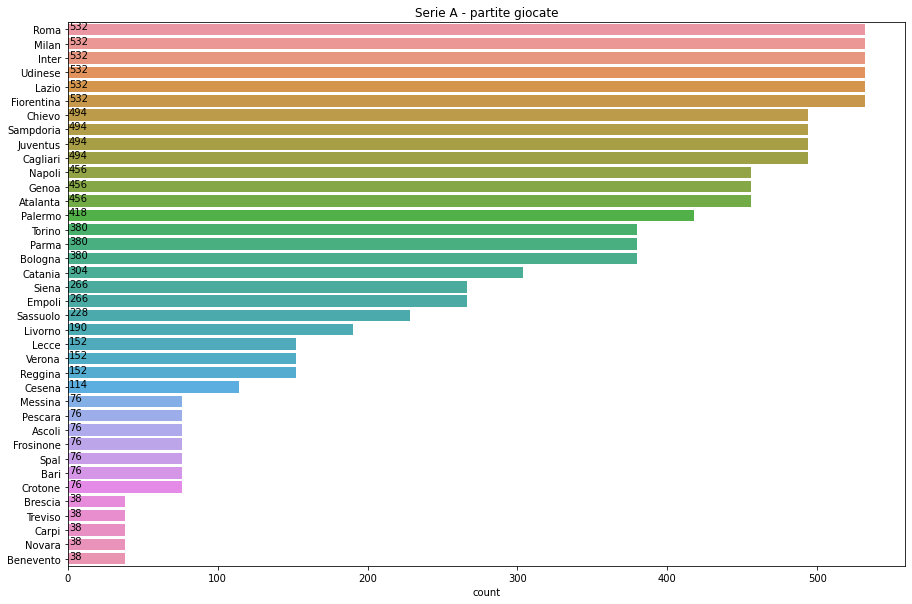

In [15]:
teams = df['HomeTeam'].append(df['AwayTeam'])
plt.figure(figsize=(15, 10))
ax = sns.countplot(y = teams, order=teams.value_counts().index, linewidth = 1)
for i,j in enumerate(teams.value_counts().values):
    ax.text(.7,i,j)
plt.title("Serie A - partite giocate")
plt.show()

### Campionati giocati per squadra

In [16]:
squadre = campionati["HomeTeam"].unique()
always = [] #lista delle squadre sempre presenti
totseasons = 14
print("Squadre con numero di campionati giocati\n")
for i in teams.unique():
    count = 0
    for j in squadre:
        if i in j:
            count+=1
    print(i, '-', count)
    if (count==totseasons) & (i not in always):
        always.append(i)

Squadre con numero di campionati giocati

Fiorentina - 14
Livorno - 5
Ascoli - 2
Inter - 14
Juventus - 13
Lazio - 14
Parma - 10
Reggina - 4
Siena - 7
Udinese - 14
Milan - 14
Palermo - 11
Cagliari - 13
Chievo - 13
Empoli - 7
Lecce - 4
Messina - 2
Roma - 14
Sampdoria - 13
Treviso - 1
Atalanta - 12
Torino - 10
Catania - 8
Genoa - 12
Napoli - 12
Bologna - 10
Bari - 2
Cesena - 3
Brescia - 1
Novara - 1
Pescara - 2
Verona - 4
Sassuolo - 6
Frosinone - 2
Carpi - 1
Crotone - 2
Benevento - 1
Spal - 2


### Squadre sempre in Serie A dal 2005 ad oggi

In [17]:
print(always)

['Fiorentina', 'Inter', 'Lazio', 'Udinese', 'Milan', 'Roma']


## Gol in e fuori casa

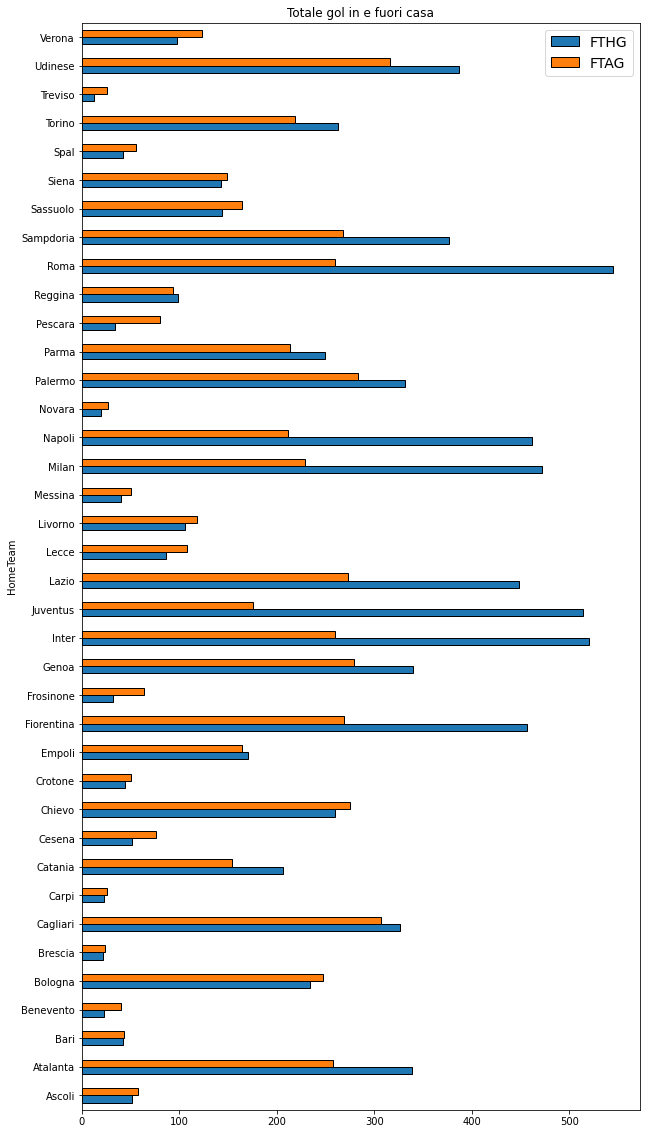

In [18]:
df.groupby("HomeTeam").agg({"FTHG":"sum","FTAG":"sum"}).plot(kind="barh", figsize = (10,20), edgecolor = "k",
                                                             linewidth = 1)
plt.title("Totale gol in e fuori casa")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.show()

## Le 10 squadre con più gol in e fuori casa

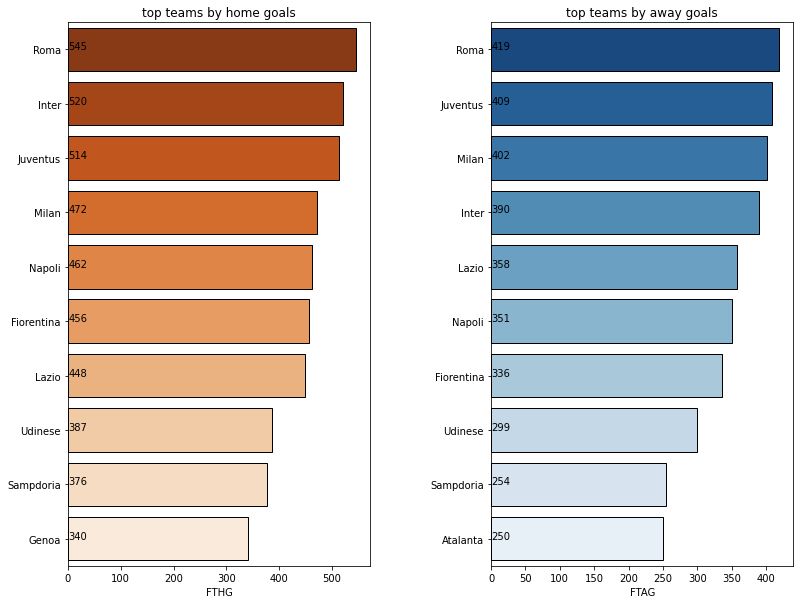

In [19]:
h_t = df.groupby("HomeTeam")["FTHG"].sum().reset_index()
a_t = df.groupby("AwayTeam")["FTAG"].sum().reset_index()
h_t = h_t.sort_values(by="FTHG",ascending= False)
a_t = a_t.sort_values(by="FTAG",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="FTHG",
                 data=h_t[:10],palette="Oranges_r",
                 linewidth = 1,edgecolor = "k"*10)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["FTHG"][:10]):
    ax.text(.7,i,j)
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="FTAG",
                 data=a_t[:10],palette="Blues_r",
                linewidth = 1,edgecolor = "k"*10)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["FTAG"][:10]):
    ax.text(.7,i,j)

## La top 5 delle squadre col maggior numero di gol

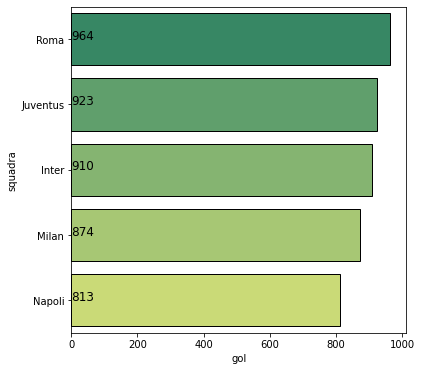

In [21]:
x = h_t
x = x.rename(columns={'HomeTeam':"squadra", 'FTHG':"gol"})
y = a_t
y = y.rename(columns={'AwayTeam':"squadra", 'FTAG':"gol"})
goals = pd.concat([x,y])
goals = goals.groupby("squadra")["gol"].sum().reset_index().sort_values(by = "gol",ascending = False)
plt.figure(figsize=(6,6))
ax = sns.barplot(x="gol",y="squadra",
                 data=goals[:5],palette="summer",
                linewidth = 1,edgecolor = "k"*5)
for i,j in enumerate(goals["gol"][:5]):
    ax.text(.3,i,j,color = "k",fontsize =12)
plt.show()

## Squadre con più gol nel primo tempo

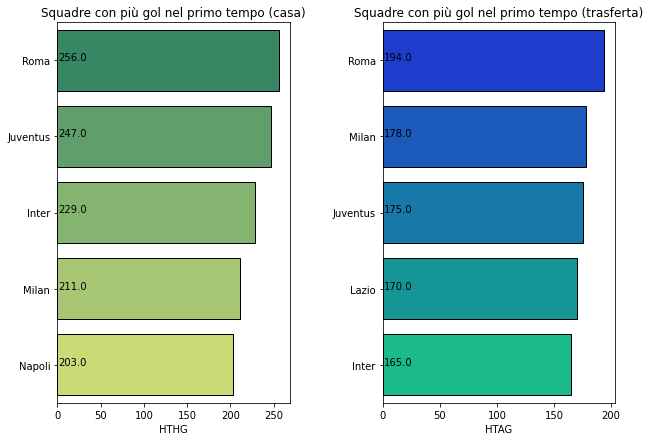

In [22]:
h_t = df.groupby("HomeTeam")["HTHG"].sum().reset_index()
a_t = df.groupby("AwayTeam")["HTAG"].sum().reset_index()
h_t = h_t.sort_values(by="HTHG",ascending= False)
a_t = a_t.sort_values(by="HTAG",ascending= False)
plt.figure(figsize=(10,7))
plt.subplot(121)
ax = sns.barplot(y="HomeTeam",x="HTHG",
                 data=h_t[:5],palette="summer",
                 linewidth = 1,edgecolor = "k"*5)
plt.ylabel('')
plt.title("Squadre con più gol nel primo tempo (casa)")
for i,j in enumerate(h_t["HTHG"][:5]):
    ax.text(.7,i,j)
plt.subplot(122)
ax = sns.barplot(y="AwayTeam",x="HTAG",
                 data=a_t[:5],palette="winter",
                linewidth = 1,edgecolor = "k"*5)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("Squadre con più gol nel primo tempo (trasferta)")
for i,j in enumerate(a_t["HTAG"][:5]):
    ax.text(.7,i,j)

## Media gol

In [23]:
mg = df.groupby("HomeTeam")["FTHG"].mean().reset_index()
mg = mg.rename(columns={'HomeTeam':'team', 'FTR':'FR'})
mg.sort_values(by='FTHG', ascending=False)

,team,FTHG
17,Juventus,2.080972
29,Roma,2.048872
23,Napoli,2.026316
16,Inter,1.954887
22,Milan,1.774436
13,Fiorentina,1.714286
18,Lazio,1.684211
25,Palermo,1.583732
30,Sampdoria,1.522267
15,Genoa,1.491228


## Distribuzione gol totali

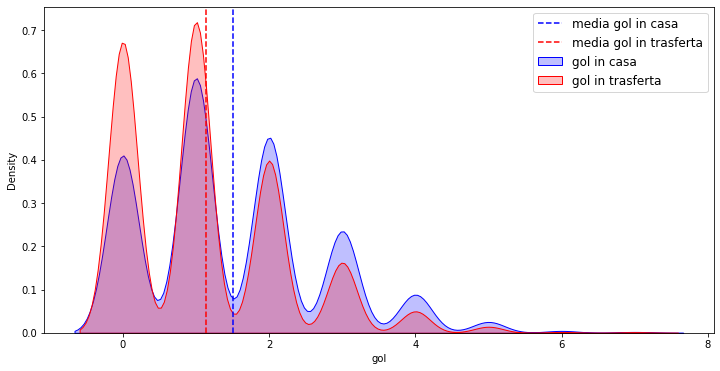

In [24]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["FTHG"],shade=True,
            color="b",label="gol in casa")
sns.kdeplot(df["FTAG"],shade=True, 
            color="r",label="gol in trasferta")
plt.axvline(df["FTHG"].mean(),linestyle = "dashed",
            color="b",label="media gol in casa")
plt.axvline(df["FTAG"].mean(),linestyle = "dashed",
            color="r",label="media gol in trasferta")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("gol")
plt.show()

Gol in casa e in trasferta seguono la distribuzione di Poisson

## Distribuzione gol nel primo tempo

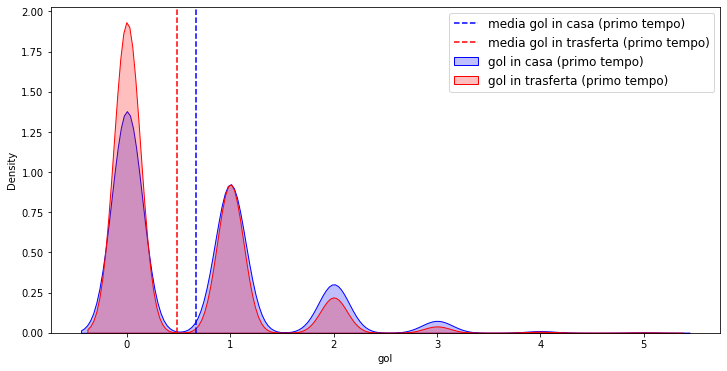

In [25]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["HTHG"],shade=True,
            color="b",label="gol in casa (primo tempo)")
sns.kdeplot(df["HTAG"],shade=True,
            color="r",label="gol in trasferta (primo tempo)")
plt.axvline(df["HTHG"].mean(),linestyle = "dashed",
            color="b",label="media gol in casa (primo tempo)")
plt.axvline(df["HTAG"].mean(),linestyle = "dashed",
            color="r",label="media gol in trasferta (primo tempo)")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("gol")
plt.show()

Diventa un'esponenziale perchè ovviamente nel primo tempo un totale di 0 gol è più probabile.

## Tiri per squadra

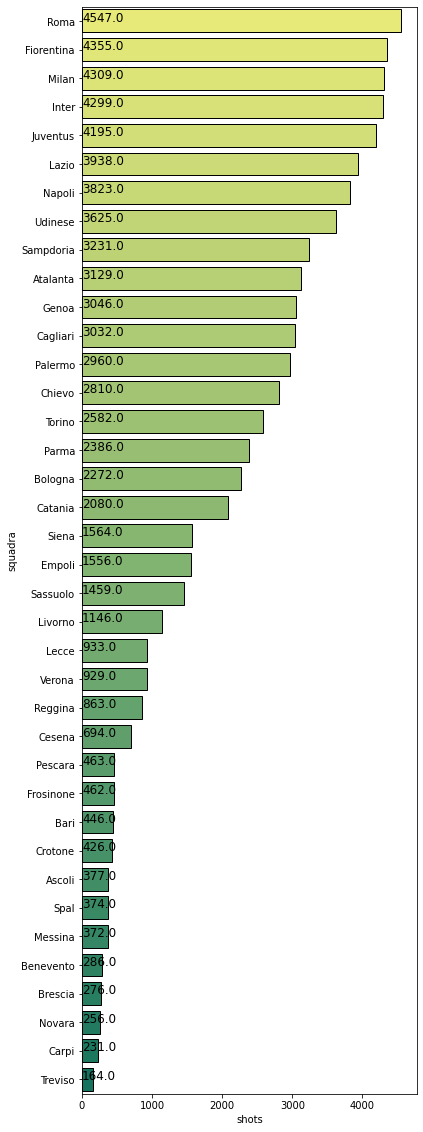

In [26]:
h_t = df.groupby("HomeTeam")["HS"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AS"].sum().reset_index()
x = h_t
x = x.rename(columns={'HomeTeam':"squadra", 'HS':"shots"})
y = a_t
y = y.rename(columns={'AwayTeam':"squadra", 'AS':"away_shots"})
shots = pd.concat([x,y],sort=True)
shots = shots.groupby("squadra")["shots"].sum().reset_index().sort_values(by = "shots",ascending = False)
plt.figure(figsize=(6,20))
ax = sns.barplot(x="shots",y="squadra",
                 data=shots,palette="summer_r",
                linewidth = 1,edgecolor = "k")
for i,j in enumerate(shots["shots"]):
    ax.text(.3,i,j,color = "k",fontsize =12)
plt.show()

## 10 squadre con più tiri in porta

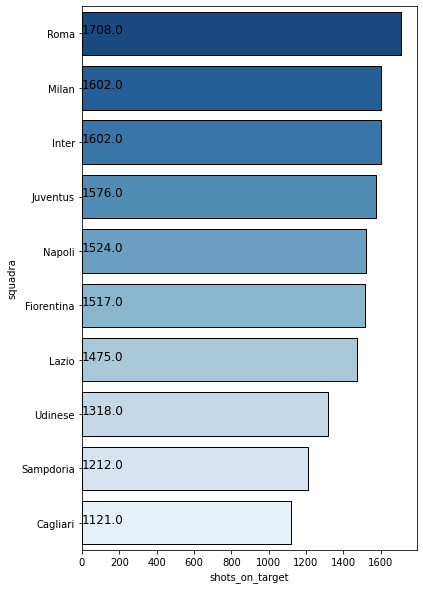

In [27]:
h_t = df.groupby("HomeTeam")["HST"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AST"].sum().reset_index()
x = h_t
x = x.rename(columns={'HomeTeam':"squadra", 'HST':"shots_on_target"})
y = a_t
y = y.rename(columns={'AwayTeam':"squadra", 'AST':"away_shots_on_target"})
shots = pd.concat([x,y],sort=True)
shots = shots.groupby("squadra")["shots_on_target"].sum().reset_index().sort_values(by = "shots_on_target",ascending = False)
plt.figure(figsize=(6,10))
ax = sns.barplot(x="shots_on_target",y="squadra",
                 data=shots[:10], linewidth = 1,edgecolor = "k"*10, palette="Blues_r")
for i,j in enumerate(shots["shots_on_target"][:10]):
    ax.text(.3,i,j,color = "k",fontsize =12)
plt.show()

## Distribuzione falli in casa e in trasferta

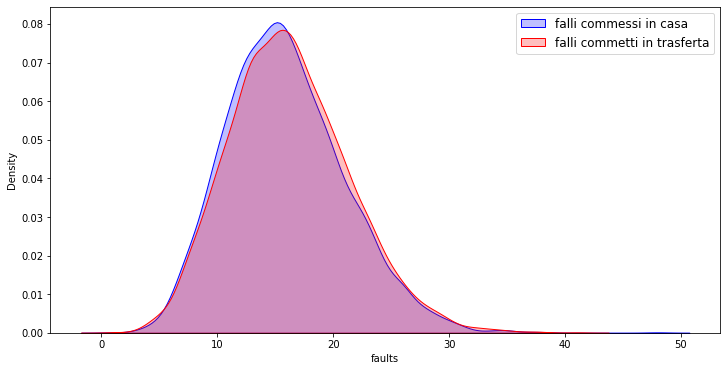

In [28]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["HF"],shade=True,
            color="b",label="falli commessi in casa")
sns.kdeplot(df["AF"],shade=True,
            color="r",label="falli commetti in trasferta")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("faults")
plt.show()

## Squadre con più falli totali

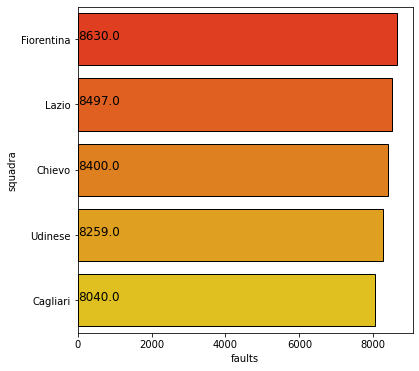

In [29]:
h_t = df.groupby("HomeTeam")["HF"].sum().reset_index()
a_t = df.groupby("AwayTeam")["AF"].sum().reset_index()
x = h_t
x = x.rename(columns={'HomeTeam':"squadra", 'HF':"faults"})
y = a_t
y = y.rename(columns={'AwayTeam':"squadra", 'AF':"faults"})
faults = pd.concat([x,y],sort=True)
faults = faults.groupby("squadra")["faults"].sum().reset_index().sort_values(by = "faults",ascending = False)
plt.figure(figsize=(6,6))
ax = sns.barplot(x="faults",y="squadra",
                 data=faults[:5],palette="autumn",
                linewidth = 1,edgecolor = "k"*5)
for i,j in enumerate(faults["faults"][:5]):
    ax.text(.3,i,j,color = "k",fontsize =12)
plt.show()

## Distribuzione calci d'angolo

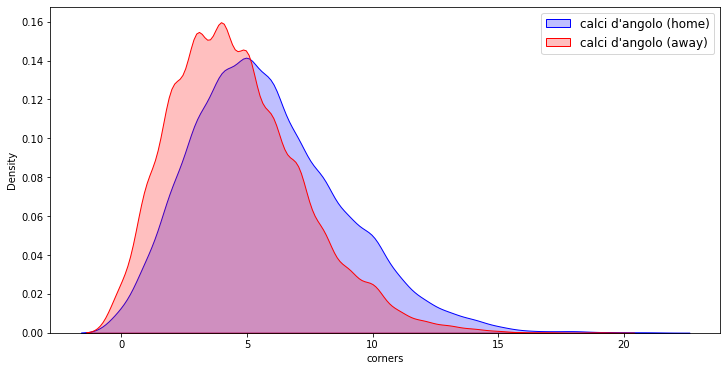

In [30]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["HC"],shade=True,
            color="b",label="calci d'angolo (home)")
sns.kdeplot(df["AC"],shade=True,
            color="r",label="calci d'angolo (away)")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("corners")
plt.show()

## Distribuzione cartellini 

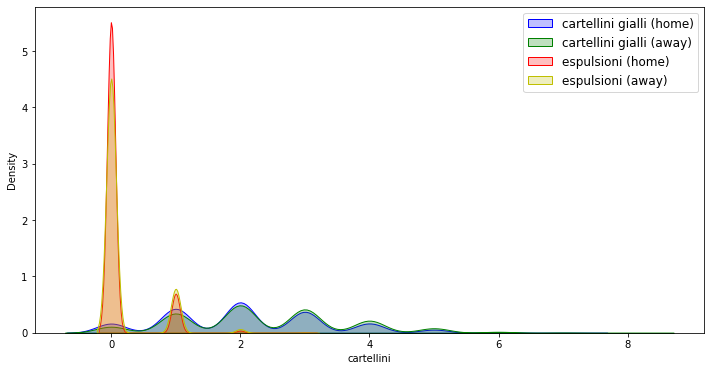

In [31]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["HY"],shade=True,
            color="b",label="cartellini gialli (home)")
sns.kdeplot(df["AY"],shade=True,
            color="g",label="cartellini gialli (away)")
sns.kdeplot(df["HR"],shade=True,
            color="r",label="espulsioni (home)")
sns.kdeplot(df["AR"],shade=True,
            color="y",label="espulsioni (away)")
plt.legend(loc="best",prop = {"size" : 12})
plt.xlabel("cartellini")
plt.show()

è molto probabile che 1 giocatore venga espulso durante una trasferta.

## Cartellini per squadra

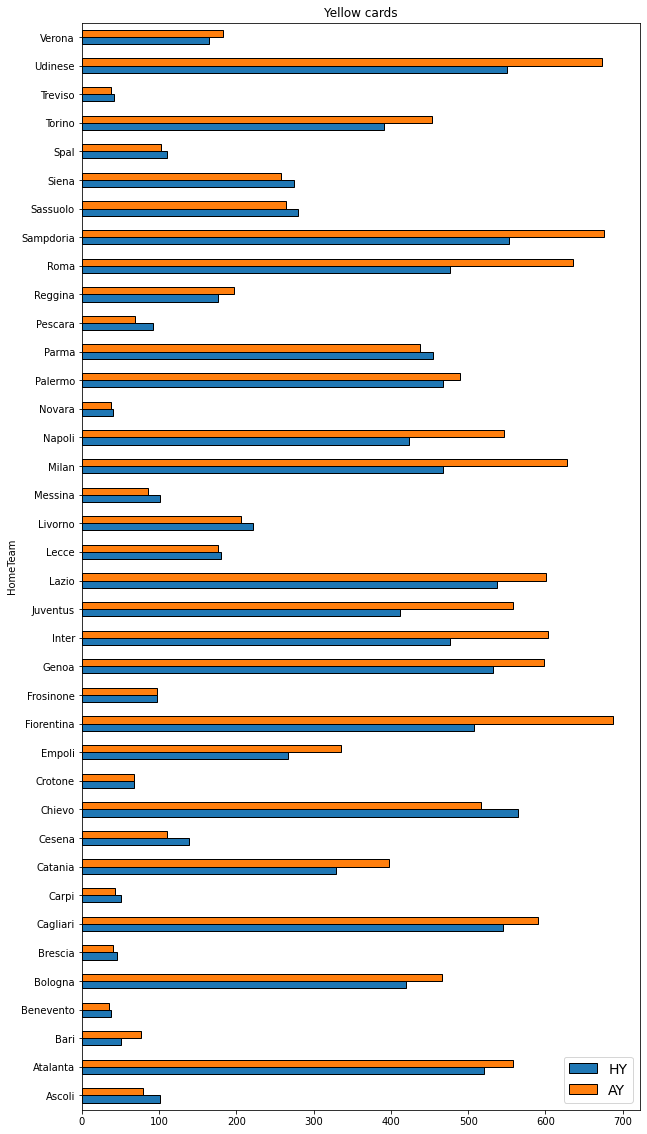

In [32]:
df.groupby("HomeTeam").agg({"HY":"sum","AY":"sum"}).plot(kind="barh",figsize = (10,20),edgecolor = "k",
                                                         linewidth =1)
plt.title("Yellow cards")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.show()


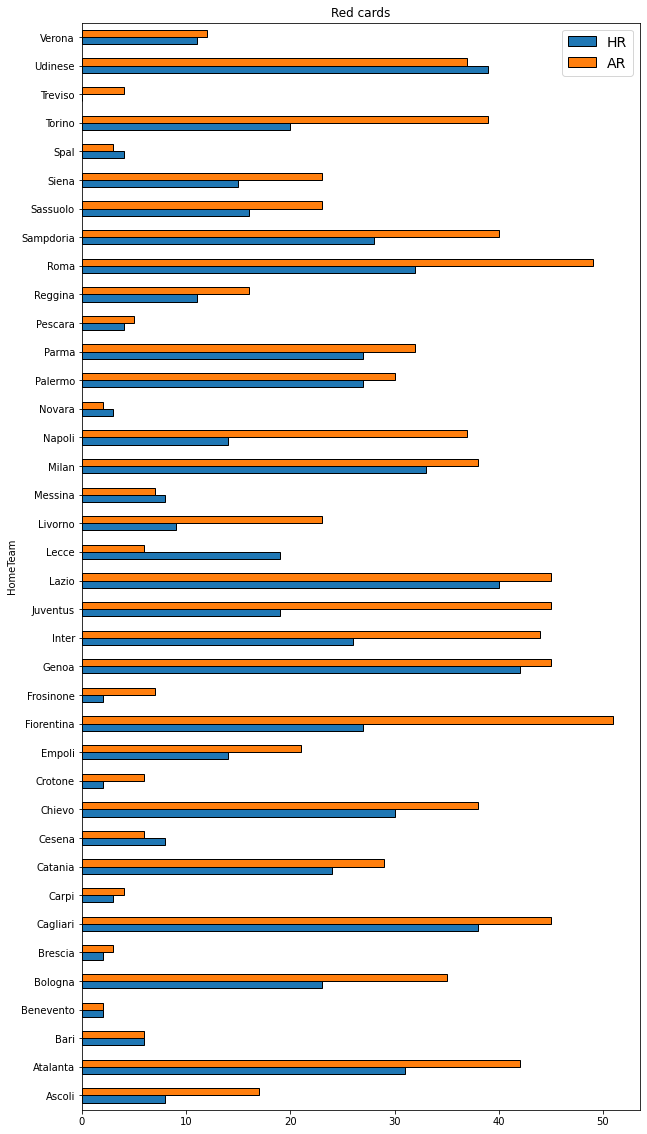

In [33]:
df.groupby("HomeTeam").agg({"HR":"sum","AR":"sum"}).plot(kind="barh",figsize = (10,20),edgecolor = "k",
                                                         linewidth =1)
plt.title("Red cards")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.show()

## Analisi dei risultati

### Proporzione risultati (esito finale)

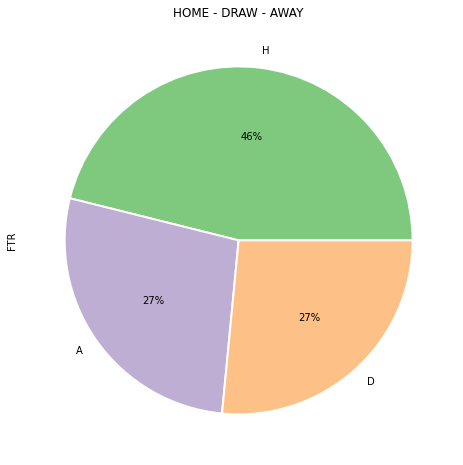

In [34]:
plt.figure(figsize=(8,8))
df["FTR"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("Accent",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.title("HOME - DRAW - AWAY")
plt.show()

### Proporzione risultati primo tempo

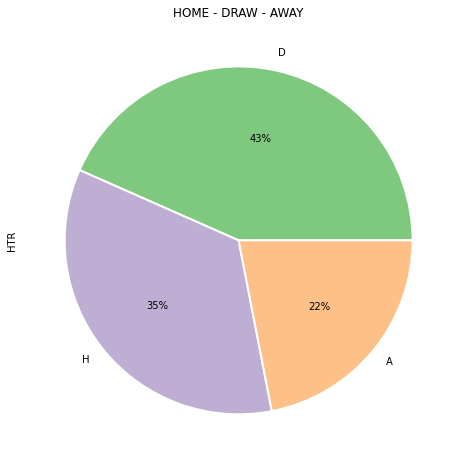

In [35]:
plt.figure(figsize=(8,8))
df["HTR"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("Accent",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.title("HOME - DRAW - AWAY")
plt.show()

I dataframe seguenti servono che costruire altre statistiche su vincite e sconfitte.

In [36]:
# Creo nuovo dataframe per il conteggio delle vittorie

wins = pd.Series(['home','away'])
home_countw = pd.Series()
away_countw = pd.Series()
home_w = df.groupby('HomeTeam')['FTR'].sum()
away_w = df.groupby('AwayTeam')['FTR'].sum()

for i in df['HomeTeam'].unique():
    home_countw[i] = home_w[i].count('H')
    away_countw[i] = away_w[i].count('A')

wins = pd.concat([home_countw,away_countw],axis=1,sort=False)
wins['tot'] = wins[0] + wins[1]
wins['team'] = df['HomeTeam'].unique()
wins.set_index('team', inplace=True)

wins.head()

,0,1,tot
team,,,
Fiorentina,147,88,235
Livorno,28,13,41
Ascoli,10,4,14
Inter,169,122,291
Juventus,181,143,324


In [37]:
# Creo nuovo dataframe per il conteggio delle sconfitte

loses = pd.Series(['home','away'])
home_countl = pd.Series()
away_countl = pd.Series()
home_l = df.groupby('HomeTeam')['FTR'].sum()
away_l = df.groupby('AwayTeam')['FTR'].sum()

for i in df['HomeTeam'].unique():
    home_countl[i] = home_l[i].count('A')
    away_countl[i] = away_l[i].count('H')

loses = pd.concat([home_countl,away_countl],axis=1,sort=False)
loses['tot'] = loses[0] + loses[1]
loses['team'] = df['HomeTeam'].unique()
loses.set_index('team', inplace=True)

loses.head()

,0,1,tot
team,,,
Fiorentina,53,103,156
Livorno,34,62,96
Ascoli,12,22,34
Inter,39,78,117
Juventus,20,45,65


In [38]:
# Creo nuovo dataframe per il conteggio dei pareggi

draws = pd.Series(['home','away'])
home_countd = pd.Series()
away_countd = pd.Series()
home_d = df.groupby('HomeTeam')['FTR'].sum()
away_d = df.groupby('AwayTeam')['FTR'].sum()

for i in df['HomeTeam'].unique():
    home_countd[i] = home_d[i].count('D')
    away_countd[i] = away_d[i].count('D')

draws = pd.concat([home_countd,away_countd],axis=1,sort=False)
draws['tot'] = draws[0] + draws[1]
draws['team'] = df['HomeTeam'].unique()
draws.set_index('team', inplace=True)

draws.head()

,0,1,tot
team,,,
Fiorentina,66,75,141
Livorno,33,20,53
Ascoli,16,12,28
Inter,58,66,124
Juventus,46,59,105


### Squadre con più vittorie - squadre con meno sconfitte

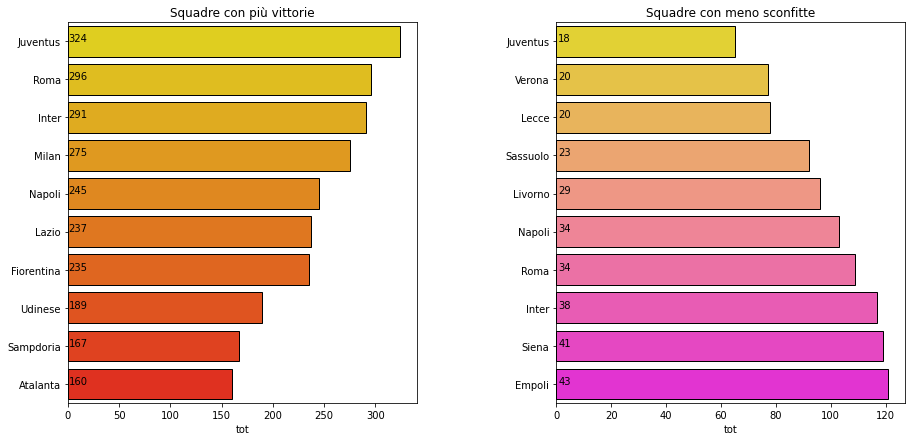

In [40]:
w = wins.groupby("team")["tot"].sum().reset_index()
l = loses.groupby("team")["tot"].sum().reset_index()
w = w.sort_values(by="tot",ascending= False)
l = l.sort_values(by="tot",ascending= True)
plt.figure(figsize=(15,7))
plt.subplot(121)
ax = sns.barplot(y="team",x="tot",
                 data=w[:10],palette="autumn_r",
                 linewidth = 1,edgecolor = "k"*10)
plt.ylabel('')
plt.title("Squadre con più vittorie")
for i,j in enumerate(w["tot"][:10]):
    ax.text(.7,i,j)
plt.subplot(122)
ax = sns.barplot(y="team",x="tot",
                 data=l[14:24],palette="spring_r", #non considero le prime squadre perché hanno giocato poche partite
                linewidth = 1,edgecolor = "k"*10)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("Squadre con meno sconfitte")
for i,j in enumerate(l["tot"][:10]):
    ax.text(.7,i,j)
    

### Vittorie fuori casa

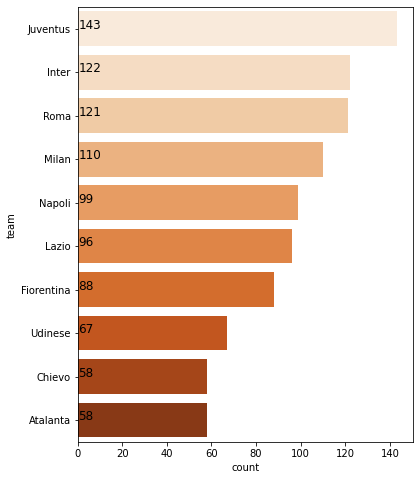

In [41]:
#prendo le prime 10 anche perché non ho proporzionato in base al numero di partite giocate
vfc = pd.DataFrame(away_countw)
vfc = vfc.rename(columns={0 : "count"})
vfc['team'] = df['HomeTeam'].unique()
vitt = vfc
vitt = vitt.sort_values(by='count',ascending=False)
plt.figure(figsize=(6,8))
ax = sns.barplot(x='count',y='team',data=vitt[:10], palette='Oranges', linewidth=1)
for i,j in enumerate(vitt['count'][:10]):
    ax.text(.3,i,j,color='k',fontsize=12)
plt.show()

### Sconfitte in casa

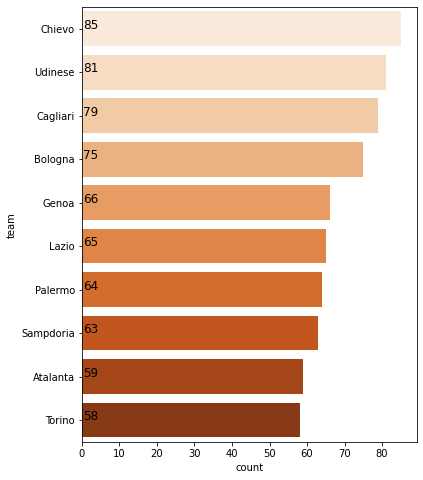

In [42]:
sc = pd.DataFrame(home_countl)
sc = sc.rename(columns={0 : "count"})
sc['team'] = df['HomeTeam'].unique()
sconf = sc
sconf = sconf.sort_values(by='count',ascending=False)
plt.figure(figsize=(6,8))
ax = sns.barplot(x='count',y='team',data=sconf[:10], palette='Oranges', linewidth=1)
for i,j in enumerate(sconf['count'][:10]):
    ax.text(.3,i,j,color='k',fontsize=12)
plt.show()

### Incontri giocati tra le squadre

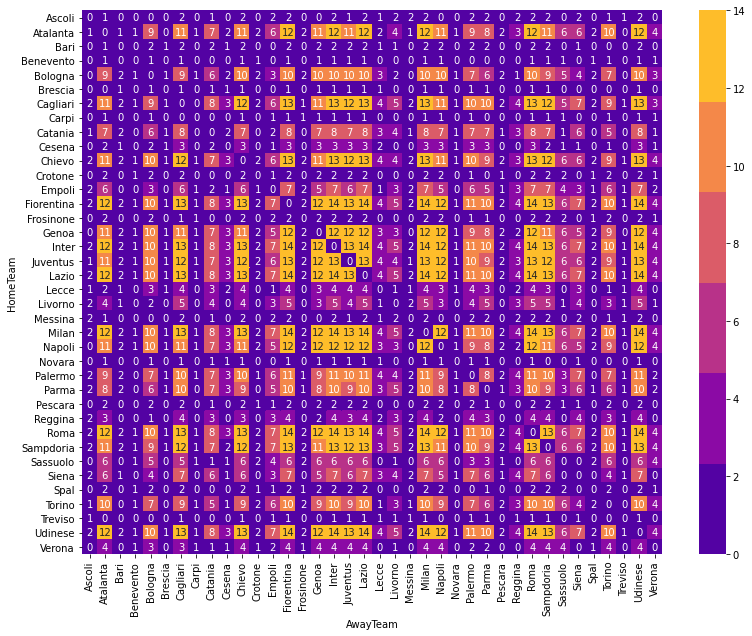

In [43]:
i = vfc.index
c = df[(df["HomeTeam"].isin(i)) & (df["AwayTeam"].isin(i))]
d = pd.crosstab(c["HomeTeam"],c["AwayTeam"])
plt.figure(figsize=(13,10))
sns.heatmap(d,annot=True,cmap=sns.color_palette("plasma"))
plt.show()

# Feature Engineering

Iniziamo col ridimensionamento del dataset: abbiamo come conseguenza un sostanzioso calo dei record, tuttavia dovrebbe rimanere un numero accettabile di record per svolgere tutte le ananlisi necessarie. Manteniamo tutti i record che presentano i campi PSCH/A/D (quote finali).

Droppiamo le righe per cui i valori di quelle colonne sono nulli.

In [44]:
pd.set_option("max_columns", 50)
dfo = df.dropna(axis=0, subset=['PSCH', 'PSCD', 'PSCA'], how='any')
dfo.shape

(2658, 47)

## New feature - DROP

DROP = 1 - quotaIniziale/quotaFinale

In [45]:
# mi servono BbAvH, BbAvD, BbAvA, PSCH, PSCD, PSCA
dfo['DROP_H'] = 1 - (dfo['BbAvH']/dfo['PSCH'])
dfo['DROP_A'] = 1 - (dfo['BbAvA']/dfo['PSCA'])
dfo['DROP_D'] = 1 - (dfo['BbAvD']/dfo['PSCD'])

Creiamo ora un DataFrame ridotto contenente i seguenti attributi: DATE - HOMETEAM - AWAYTEAM - QUOTE_IN - QUOTE_FIN - DROP - OUTCOME

In [46]:
dfo.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAvAHH,PSCH,PSCD,PSCA,Season,DROP_H,DROP_A,DROP_D
2660,2012-08-25,Fiorentina,Udinese,2,1,H,0.0,1.0,A,23.0,7.0,8.0,2.0,12.0,14.0,10.0,0.0,2.0,1.0,0.0,0.0,2.05,3.2,3.75,2.05,3.30,3.90,2.00,3.20,3.40,38.0,2.10,2.05,3.33,3.21,4.15,3.71,31.0,2.33,2.20,1.73,1.66,1.76,1.97,3.31,4.74,2012/2013,-0.040609,0.217300,0.030211
2661,2012-08-25,Juventus,Parma,2,0,H,0.0,0.0,D,15.0,6.0,6.0,5.0,12.0,21.0,5.0,8.0,2.0,6.0,0.0,0.0,1.30,5.0,10.50,1.28,5.00,11.00,1.35,4.50,7.30,38.0,1.35,1.30,5.40,4.95,12.27,10.26,31.0,1.83,1.76,2.15,2.04,1.96,1.36,5.03,11.65,2012/2013,0.044118,0.119313,0.015905
2662,2012-08-26,Atalanta,Lazio,0,1,A,0.0,1.0,A,10.0,13.0,3.0,4.0,14.0,19.0,8.0,5.0,1.0,4.0,0.0,0.0,2.40,3.2,3.00,2.40,3.20,2.95,2.60,3.10,2.60,33.0,2.60,2.42,3.25,3.16,3.33,2.94,31.0,2.38,2.26,1.68,1.62,2.05,2.68,3.20,2.98,2012/2013,0.097015,0.013423,0.012500
2663,2012-08-26,Chievo,Bologna,2,0,H,0.0,0.0,D,6.0,4.0,3.0,1.0,17.0,18.0,1.0,1.0,3.0,3.0,0.0,1.0,2.10,3.2,3.60,2.10,3.15,3.60,2.20,3.00,3.20,35.0,2.25,2.14,3.20,3.11,4.03,3.59,31.0,2.51,2.35,1.64,1.57,1.83,2.04,3.25,4.45,2012/2013,-0.049020,0.193258,0.043077
2664,2012-08-26,Genoa,Cagliari,2,0,H,0.0,0.0,D,15.0,17.0,4.0,4.0,19.0,12.0,3.0,6.0,0.0,3.0,0.0,0.0,1.95,3.3,4.00,2.00,3.25,3.80,2.00,3.15,3.45,35.0,2.10,2.01,3.30,3.22,4.34,3.84,31.0,2.21,2.11,1.79,1.71,2.03,2.64,3.14,3.10,2012/2013,0.238636,-0.238710,-0.025478


Creo il nuovo dataframe __dfn__:

In [47]:
dfn = pd.DataFrame()
attr_n = ['DATE', 'HT', 'AT', 'qIN_h', 'qIN_d', 'qIN_a', 'qF_h', 'qF_d', 'qF_a', 'DROP_H', 'DROP_D', 'DROP_A', 'OUTCOME']
attr_o = ['Date', 'HomeTeam', 'AwayTeam', 'BbAvH', 'BbAvD', 'BbAvA', 'PSCH', 'PSCD', 'PSCA', 'DROP_H', 'DROP_D', 'DROP_A', 'FTR']
dfn[attr_n] = dfo[attr_o]
dfn.head()

,DATE,HT,AT,qIN_h,qIN_d,qIN_a,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME
2660,2012-08-25,Fiorentina,Udinese,2.05,3.21,3.71,1.97,3.31,4.74,-0.040609,0.030211,0.217300,H
2661,2012-08-25,Juventus,Parma,1.30,4.95,10.26,1.36,5.03,11.65,0.044118,0.015905,0.119313,H
2662,2012-08-26,Atalanta,Lazio,2.42,3.16,2.94,2.68,3.20,2.98,0.097015,0.012500,0.013423,A
2663,2012-08-26,Chievo,Bologna,2.14,3.11,3.59,2.04,3.25,4.45,-0.049020,0.043077,0.193258,H
2664,2012-08-26,Genoa,Cagliari,2.01,3.22,3.84,2.64,3.14,3.10,0.238636,-0.025478,-0.238710,H


Vogliamo semplificare la lettura del campo OUTCOME e renderla più simile alla dicitura 1 X 2.

D'ora in poi il campo OUTCOME indicherà l'esito del risultato in questo modo: 1 - H , 0 - D , 2 - A

In [48]:
dfn['OUTCOME'] = dfn['OUTCOME'].map({'H': 1, 'D': 0, 'A': 2})
dfn.head(10)

,DATE,HT,AT,qIN_h,qIN_d,qIN_a,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME
2660,2012-08-25,Fiorentina,Udinese,2.05,3.21,3.71,1.97,3.31,4.74,-0.040609,0.030211,0.217300,1
2661,2012-08-25,Juventus,Parma,1.30,4.95,10.26,1.36,5.03,11.65,0.044118,0.015905,0.119313,1
2662,2012-08-26,Atalanta,Lazio,2.42,3.16,2.94,2.68,3.20,2.98,0.097015,0.012500,0.013423,2
2663,2012-08-26,Chievo,Bologna,2.14,3.11,3.59,2.04,3.25,4.45,-0.049020,0.043077,0.193258,1
2664,2012-08-26,Genoa,Cagliari,2.01,3.22,3.84,2.64,3.14,3.10,0.238636,-0.025478,-0.238710,1
2665,2012-08-26,Milan,Sampdoria,1.40,4.33,8.21,1.51,4.15,8.50,0.072848,-0.043373,0.034118,2
2666,2012-08-26,Palermo,Napoli,2.97,3.22,2.39,3.24,3.42,2.39,0.083333,0.058480,0.000000,2
2667,2012-08-26,Pescara,Inter,4.47,3.47,1.80,3.99,3.32,2.15,-0.120301,-0.045181,0.162791,2
2668,2012-08-26,Roma,Catania,1.40,4.40,7.92,1.47,4.65,8.00,0.047619,0.053763,0.010000,0
2669,2012-08-26,Siena,Torino,2.26,3.13,3.30,2.44,3.13,3.45,0.073770,0.000000,0.043478,0


Diamo un'occhiata alle correlazioni di dfn

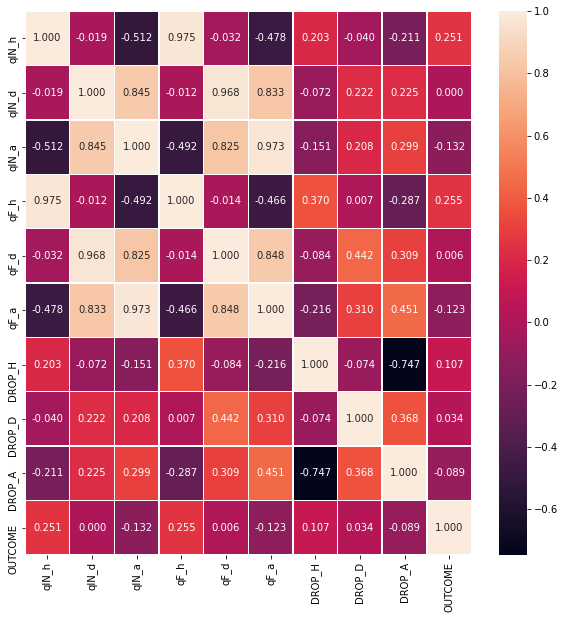

In [49]:
plt.figure(figsize=(10,10))
fig = sns.heatmap(dfn.corr(), annot=True,linewidths=.5,fmt='.3f')
plt.show()

Per il momento di interessante abbiamo una correlazione del 25% tra OUTCOME e qIN_h/qF_h. 

In [50]:
dfn.corr()

,qIN_h,qIN_d,qIN_a,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME
qIN_h,1.000000,-0.019052,-0.511721,0.975388,-0.031668,-0.478391,0.202560,-0.039780,-0.210629,0.250929
qIN_d,-0.019052,1.000000,0.844656,-0.012238,0.968029,0.833074,-0.072282,0.222210,0.225385,0.000115
qIN_a,-0.511721,0.844656,1.000000,-0.492395,0.824830,0.972836,-0.150525,0.208030,0.299149,-0.131538
qF_h,0.975388,-0.012238,-0.492395,1.000000,-0.013753,-0.466452,0.369884,0.006708,-0.287039,0.254625
qF_d,-0.031668,0.968029,0.824830,-0.013753,1.000000,0.848385,-0.083748,0.442370,0.308825,0.006016
qF_a,-0.478391,0.833074,0.972836,-0.466452,0.848385,1.000000,-0.215826,0.310031,0.451322,-0.122685
DROP_H,0.202560,-0.072282,-0.150525,0.369884,-0.083748,-0.215826,1.000000,-0.074429,-0.747188,0.107332
DROP_D,-0.039780,0.222210,0.208030,0.006708,0.442370,0.310031,-0.074429,1.000000,0.367562,0.033819
DROP_A,-0.210629,0.225385,0.299149,-0.287039,0.308825,0.451322,-0.747188,0.367562,1.000000,-0.088502
OUTCOME,0.250929,0.000115,-0.131538,0.254625,0.006016,-0.122685,0.107332,0.033819,-0.088502,1.000000


In [51]:
dfo['OUTCOME'] = dfn['OUTCOME']

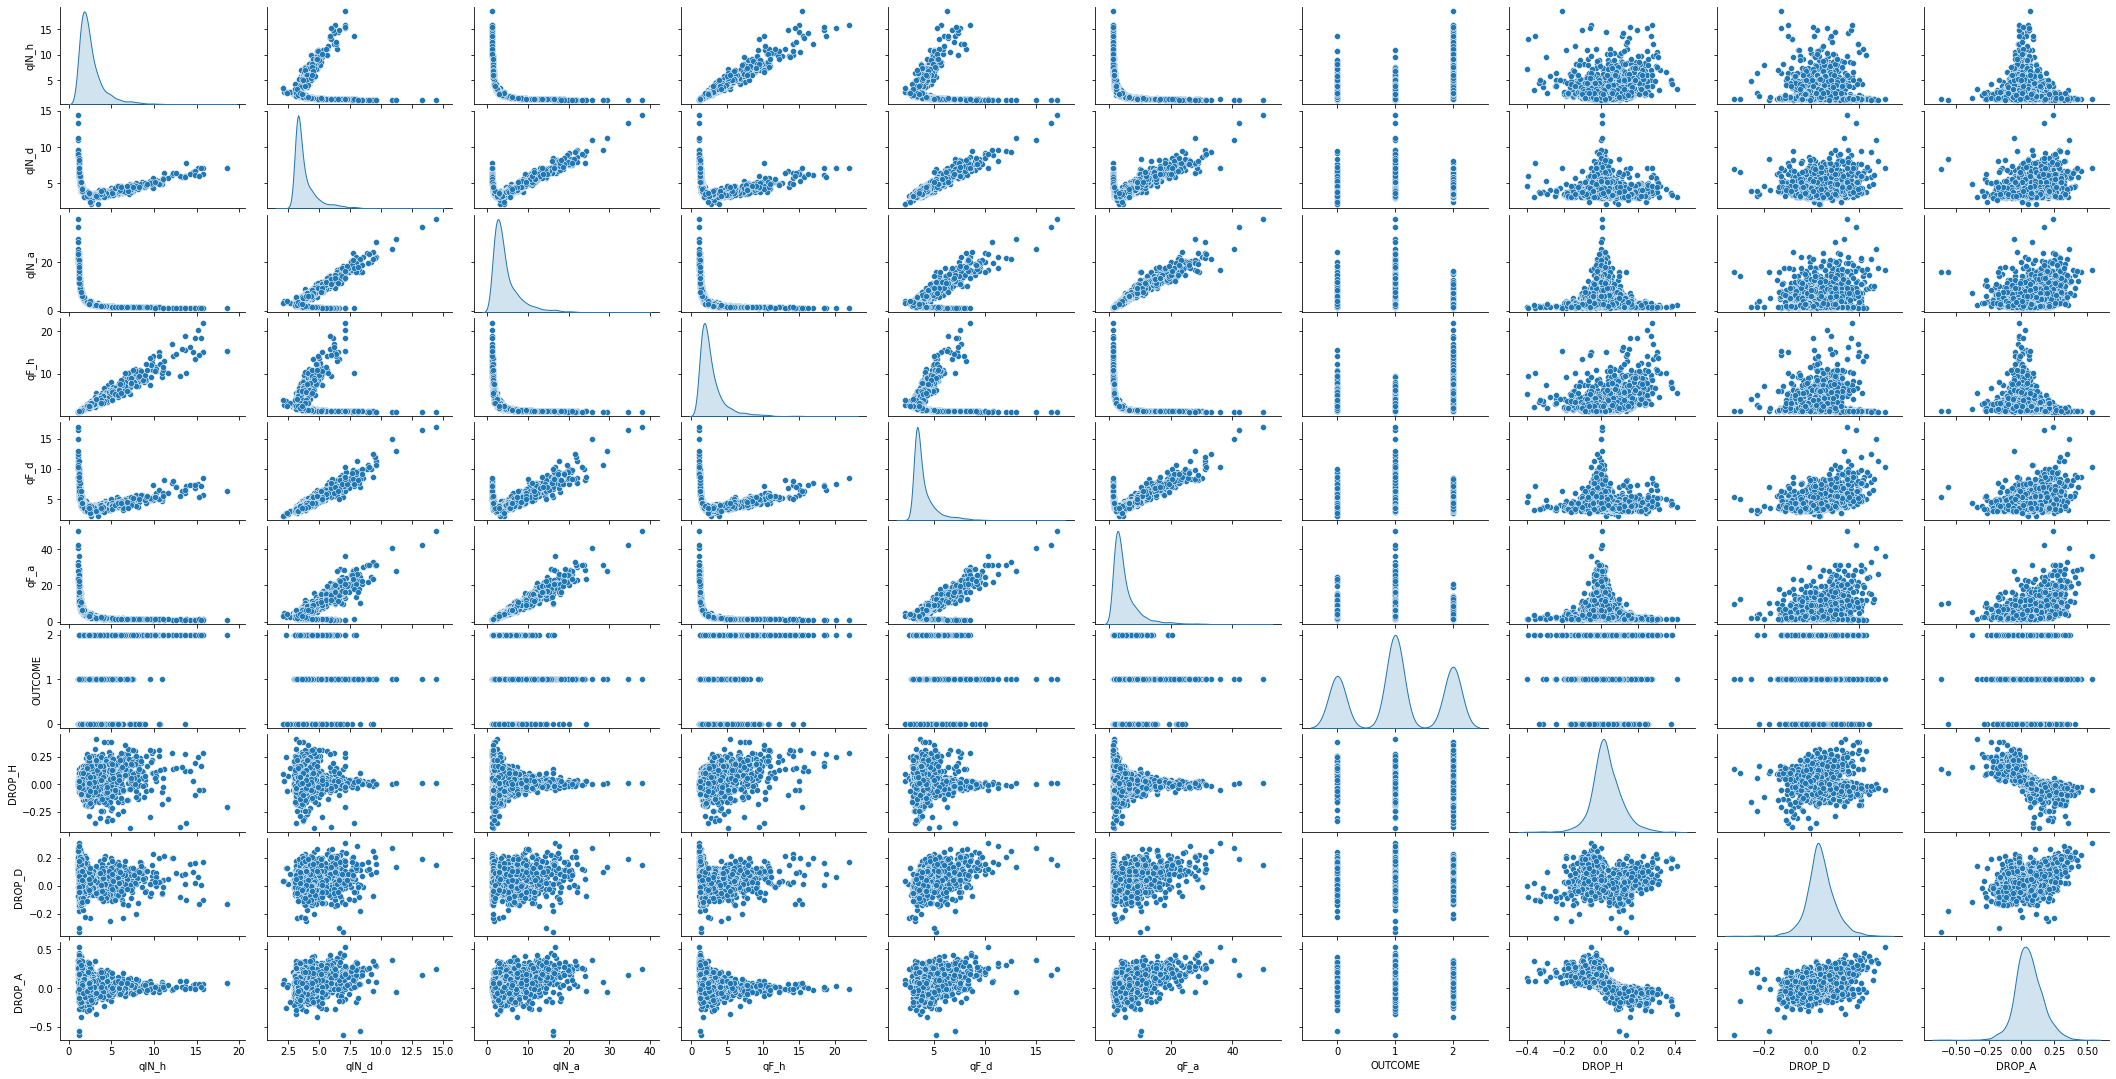

In [52]:
attributes = ['qIN_h', 'qIN_d', 'qIN_a','qF_h', 'qF_d', 'qF_a', 'OUTCOME', 'DROP_H', 'DROP_D', 'DROP_A']
g= sns.pairplot(dfn,
                 x_vars = attributes,
                 y_vars = attributes,
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(30,15)

L'unica cosa che possiamo notare è la correlazione quasi lineare tra le quote all'apertura e quelle alla chiusura, pertanto questi dati sono ridondanti. Preferiamo conservare per la nostra analisi le quote alla chiusura, droppiamo quindi i campi qIN_h, qIN_a e qIN_d.

In [53]:
todrop = ['qIN_h', 'qIN_d', 'qIN_a']
dfn = dfn.drop(todrop, axis=1)

## Discretizzazione quote

Creiamo dei campi a parte per le discretizzazioni dal momento che non siamo convinti della loro utilità.

In [54]:
bins = [1.20, 1.40, 1.70, 2.00, 2.50, 3.00, 3.50, 4, 5, 6, 7, 8, 9, 10, 20]
dfn['qF_hD'] = pd.cut(dfn.qF_h, bins)
dfn['qF_dD'] = pd.cut(dfn.qF_d, bins)
dfn['qF_aD'] = pd.cut(dfn.qF_a, bins)

In ogni caso questa discretizzazione è utile per dare uno sguardo più compatto alle probabilità e quindi fare delle considerazioni sull'affidabilità delle quote.

In [55]:
tmp = dfn.groupby(['qF_hD','OUTCOME'])[['OUTCOME']].count()
tmp = tmp.rename({'OUTCOME':'count'}, axis=1)
tmp['prob'] = tmp['count']/dfn.groupby('qF_hD').count()['OUTCOME']
tmp

count      prob
qF_hD        OUTCOME                 
(1.2, 1.4]   0         36.0  0.144578
             1        196.0  0.787149
             2         17.0  0.068273
(1.4, 1.7]   0         92.0  0.220096
             1        268.0  0.641148
             2         58.0  0.138756
(1.7, 2.0]   0         89.0  0.269697
             1        183.0  0.554545
             2         58.0  0.175758
(2.0, 2.5]   0        166.0  0.318618
             1        235.0  0.451056
             2        120.0  0.230326
(2.5, 3.0]   0         88.0  0.315412
             1         95.0  0.340502
             2         96.0  0.344086
(3.0, 3.5]   0         63.0  0.283784
             1         70.0  0.315315
             2         89.0  0.400901
(3.5, 4.0]   0         31.0  0.234848
             1         23.0  0.174242
             2         78.0  0.590909
(4.0, 5.0]   0         47.0  0.313333
             1         22.0  0.146667
             2         81.0  0.540000
(5.0, 6.0]   0         22.0  0.229167
             1         19.0  0.197917
             2         55.0  0.572917
(6.0, 7.0]   0         11.0  0.239130
             1          7.0  0.152174
             2         28.0  0.608696
(7.0, 8.0]   0          5.0  0.119048
             1          7.0  0.166667
             2         30.0  0.714286
(8.0, 9.0]   0          4.0  0.173913
             1          1.0  0.043478
             2         18.0  0.782609
(9.0, 10.0]  0          4.0  0.200000
             1          2.0  0.100000
             2         14.0  0.700000
(10.0, 20.0] 0          5.0  0.106383
             1          NaN       NaN
             2         42.0  0.893617

Abbiamo confermato ciò che sappiamo riguardo le quote. Innanzitutto all'aumentare della quota, la probabilità di 1 diminuisce (dal 75% fino al 3%), mentre le probabilità di X e 2 aumentano progressivamente. La probabilità di X aumenta ovviamente più velocemente. 

Inoltre, sapendo ad esempio che una quota a 2.00 per l'1 indica una probabilità del 50% che vinca la squadra di casa, abbiamo constatato che effettivamente nell'intervallo di quote (1.70,2.00] l'outcome 1 si verifica nel 52% dei casi. Abbiamo anche confermato che le quote più basse (tra 1.10 e 2.50) sono le migliori essendo più veritiere, mentre quelle più alte, ad esempio (3.5,4.00] che determinano una probabilità teorica media del 25%, risultano essere le peggiori dal momento che la probabilità reale media gira intorno al 20%. 

Vediamo se anche le quote per il 2 sono affidabili allo stesso modo:

In [56]:
tmp = dfn.groupby(['qF_aD','OUTCOME'])[['OUTCOME']].count()
tmp = tmp.rename({'OUTCOME':'count'}, axis=1)
tmp['prob'] = tmp['count']/dfn.groupby('qF_aD').count()['OUTCOME']
tmp

count      prob
qF_aD        OUTCOME                 
(1.2, 1.4]   0          7.0  0.122807
             1          NaN       NaN
             2         50.0  0.877193
(1.4, 1.7]   0         31.0  0.206667
             1         24.0  0.160000
             2         95.0  0.633333
(1.7, 2.0]   0         46.0  0.265896
             1         25.0  0.144509
             2        102.0  0.589595
(2.0, 2.5]   0         87.0  0.262840
             1         85.0  0.256798
             2        159.0  0.480363
(2.5, 3.0]   0         79.0  0.302682
             1         80.0  0.306513
             2        102.0  0.390805
(3.0, 3.5]   0         91.0  0.322695
             1        121.0  0.429078
             2         70.0  0.248227
(3.5, 4.0]   0         75.0  0.350467
             1         90.0  0.420561
             2         49.0  0.228972
(4.0, 5.0]   0         80.0  0.266667
             1        161.0  0.536667
             2         59.0  0.196667
(5.0, 6.0]   0         55.0  0.273632
             1        118.0  0.587065
             2         28.0  0.139303
(6.0, 7.0]   0         27.0  0.200000
             1         85.0  0.629630
             2         23.0  0.170370
(7.0, 8.0]   0         21.0  0.190909
             1         74.0  0.672727
             2         15.0  0.136364
(8.0, 9.0]   0         19.0  0.206522
             1         58.0  0.630435
             2         15.0  0.163043
(9.0, 10.0]  0         15.0  0.208333
             1         53.0  0.736111
             2          4.0  0.055556
(10.0, 20.0] 0         31.0  0.142202
             1        175.0  0.802752
             2         12.0  0.055046

Sul 2 la discrepanza tra probabilità predetta (quota) e probabilità reale va via via diminuendo. Se prendiamo in considerazione il primo intervallo, la quota media predetta è 100/1.3 = 76.9%, mentre quella reale è molto più alta (87.7%). Se prendiamo una quota a 2.75 invece la probabilità predetta è 36,3%, mentre quella reale è 39%. Per le quote più basse accade quindi il contrario delle quote per l'1, cioè le quote più basse sono sottovalutate, mentre quelle intermedie sono le migliori.

---

## Odds statistics

Vogliamo completare le statistiche sui dati aggiungendo alcune statistiche sulle quote. Ci serve quindi aggiungere momentaneamente i singoli risultati finali del match:

In [57]:
#Full Home Result
dfn['FHR']=df['FTHG']
#Full Away Result
dfn['FAR']=df['FTAG']

Aggiungiamo anche il campo season

In [58]:
dfn['season']=df['Season']
dfn.head()

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
2660,2012-08-25,Fiorentina,Udinese,1.97,3.31,4.74,-0.040609,0.030211,0.217300,1,"(1.7, 2.0]","(3.0, 3.5]","(4.0, 5.0]",2,1,2012/2013
2661,2012-08-25,Juventus,Parma,1.36,5.03,11.65,0.044118,0.015905,0.119313,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",2,0,2012/2013
2662,2012-08-26,Atalanta,Lazio,2.68,3.20,2.98,0.097015,0.012500,0.013423,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",0,1,2012/2013
2663,2012-08-26,Chievo,Bologna,2.04,3.25,4.45,-0.049020,0.043077,0.193258,1,"(2.0, 2.5]","(3.0, 3.5]","(4.0, 5.0]",2,0,2012/2013
2664,2012-08-26,Genoa,Cagliari,2.64,3.14,3.10,0.238636,-0.025478,-0.238710,1,"(2.5, 3.0]","(3.0, 3.5]","(3.0, 3.5]",2,0,2012/2013


### Statistics on DROP

Vediamo di ordinare per campi DROP

In [59]:
dfn1 = dfn.sort_values(by='DROP_H', axis=0, ascending=False)
dfn1.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
3423,2014-08-31,Cesena,Parma,5.44,3.65,1.76,0.413603,0.142466,-0.340909,1,"(5.0, 6.0]","(3.5, 4.0]","(1.7, 2.0]",1,0,2014/2015
4193,2016-08-28,Crotone,Genoa,6.75,4.14,1.58,0.383704,0.190821,-0.234177,2,"(6.0, 7.0]","(4.0, 5.0]","(1.4, 1.7]",1,3,2016/2017
3813,2015-08-30,Carpi,Inter,7.45,3.97,1.58,0.382550,0.125945,-0.139241,2,"(7.0, 8.0]","(3.5, 4.0]","(1.4, 1.7]",1,2,2015/2016
4054,2016-02-21,Frosinone,Lazio,8.07,4.59,1.47,0.381660,0.198257,-0.170068,0,"(8.0, 9.0]","(4.0, 5.0]","(1.4, 1.7]",0,0,2015/2016
4842,2018-03-18,Verona,Atalanta,10.11,5.01,1.38,0.351137,0.175649,-0.108696,2,"(10.0, 20.0]","(5.0, 6.0]","(1.2, 1.4]",0,5,2017/2018
4788,2018-04-02,Verona,Roma,10.20,5.15,1.36,0.319608,0.102913,-0.066176,2,"(10.0, 20.0]","(5.0, 6.0]","(1.2, 1.4]",0,1,2017/2018
3750,2015-02-05,Sampdoria,Juventus,4.54,3.26,2.03,0.317181,0.030675,-0.187192,2,"(4.0, 5.0]","(3.0, 3.5]","(2.0, 2.5]",0,1,2014/2015
4818,2018-02-26,Cagliari,Napoli,13.80,5.10,1.32,0.308696,0.013725,-0.015152,2,"(10.0, 20.0]","(5.0, 6.0]","(1.2, 1.4]",0,5,2017/2018
4073,2016-06-03,Atalanta,Juventus,10.50,4.17,1.46,0.307619,0.076739,-0.041096,2,"(10.0, 20.0]","(4.0, 5.0]","(1.4, 1.7]",0,2,2015/2016
4230,2016-09-24,Palermo,Juventus,15.21,6.56,1.25,0.307035,0.199695,-0.048000,2,"(10.0, 20.0]","(6.0, 7.0]","(1.2, 1.4]",0,1,2016/2017


In [60]:
dfn2 = dfn.sort_values(by='DROP_A', axis=0, ascending=False)
dfn2.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
4544,2017-05-21,Juventus,Crotone,1.12,10.29,36.07,-0.053571,0.309038,0.538675,1,NaN,"(10.0, 20.0]",NaN,3,0,2016/2017
3134,2013-10-30,Juventus,Catania,1.15,8.60,29.00,-0.026087,0.222093,0.455172,1,NaN,"(8.0, 9.0]",NaN,4,0,2013/2014
3205,2013-12-22,Roma,Catania,1.16,6.91,21.26,-0.068966,0.143271,0.428504,1,NaN,"(6.0, 7.0]",NaN,4,0,2013/2014
3605,2015-01-18,Juventus,Verona,1.15,8.65,28.60,-0.026087,0.184971,0.425524,1,NaN,"(8.0, 9.0]",NaN,4,0,2014/2015
3224,2014-12-01,Roma,Genoa,1.26,6.06,15.69,-0.087302,0.242574,0.411727,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",4,0,2013/2014
2988,2013-04-21,Roma,Pescara,1.14,9.01,24.57,-0.035088,0.241953,0.404965,0,NaN,"(9.0, 10.0]",NaN,1,1,2012/2013
3416,2014-05-18,Lazio,Bologna,1.34,5.49,11.08,-0.097015,0.196721,0.400722,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",1,0,2013/2014
3194,2013-12-15,Juventus,Sassuolo,1.16,8.20,28.00,-0.017241,0.214634,0.393214,1,NaN,"(8.0, 9.0]",NaN,4,0,2013/2014
3237,2014-01-19,Milan,Verona,1.36,5.10,11.35,-0.058824,0.131373,0.378855,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",1,0,2013/2014
3141,2013-02-11,Napoli,Catania,1.20,7.29,19.85,-0.025000,0.193416,0.373804,1,NaN,"(7.0, 8.0]","(10.0, 20.0]",2,1,2013/2014


In [61]:
dfn3 = dfn.sort_values(by='DROP_D', axis=0, ascending=False)
dfn3.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
4544,2017-05-21,Juventus,Crotone,1.12,10.29,36.07,-0.053571,0.309038,0.538675,1,NaN,"(10.0, 20.0]",NaN,3,0,2016/2017
4911,2018-05-05,Milan,Verona,1.11,11.25,26.20,-0.036036,0.281778,0.327481,1,NaN,"(10.0, 20.0]",NaN,4,1,2017/2018
4172,2016-05-14,Napoli,Frosinone,1.08,15.00,40.40,0.000000,0.270667,0.364356,1,NaN,"(10.0, 20.0]",NaN,4,0,2015/2016
4541,2017-05-20,Napoli,Fiorentina,1.22,8.25,12.80,-0.040984,0.261818,0.215625,1,"(1.2, 1.4]","(8.0, 9.0]","(10.0, 20.0]",4,1,2016/2017
3364,2014-04-13,Milan,Catania,1.29,6.57,10.65,-0.031008,0.260274,0.101408,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",1,0,2013/2014
4170,2016-05-14,Juventus,Sampdoria,1.21,7.80,15.49,-0.049587,0.252564,0.335055,1,"(1.2, 1.4]","(7.0, 8.0]","(10.0, 20.0]",5,0,2015/2016
4754,2018-06-01,Napoli,Verona,1.10,12.50,33.00,-0.018182,0.249600,0.348182,1,NaN,"(10.0, 20.0]",NaN,2,0,2017/2018
3224,2014-12-01,Roma,Genoa,1.26,6.06,15.69,-0.087302,0.242574,0.411727,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",4,0,2013/2014
2988,2013-04-21,Roma,Pescara,1.14,9.01,24.57,-0.035088,0.241953,0.404965,0,NaN,"(9.0, 10.0]",NaN,1,1,2012/2013
3359,2014-07-04,Juventus,Livorno,1.14,9.40,24.00,-0.017544,0.232979,0.279167,1,NaN,"(9.0, 10.0]",NaN,2,0,2013/2014


In [62]:
dfn4 = dfn.sort_values(by='DROP_H', axis=0, ascending=True)
dfn4.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
3390,2014-04-05,Catania,Roma,5.18,4.57,1.64,-0.395753,-0.004376,0.134146,1,"(5.0, 6.0]","(4.0, 5.0]","(1.4, 1.7]",4,1,2013/2014
4264,2016-10-23,Crotone,Napoli,9.39,5.56,1.36,-0.390841,-0.080935,0.088235,2,"(9.0, 10.0]","(5.0, 6.0]","(1.2, 1.4]",1,2,2016/2017
4923,2018-05-13,Bologna,Chievo,2.26,3.20,3.76,-0.358407,0.018750,0.353723,2,"(2.0, 2.5]","(3.0, 3.5]","(3.5, 4.0]",1,2,2017/2018
4558,2017-05-28,Sampdoria,Napoli,10.15,7.10,1.28,-0.352709,-0.100000,0.085938,2,"(10.0, 20.0]","(7.0, 8.0]","(1.2, 1.4]",2,4,2016/2017
4529,2017-07-05,Udinese,Atalanta,3.37,3.37,2.34,-0.332344,-0.103858,0.235043,0,"(3.0, 3.5]","(3.0, 3.5]","(2.0, 2.5]",1,1,2016/2017
5293,2019-12-05,Frosinone,Udinese,3.82,3.32,2.16,-0.324607,-0.108434,0.199074,2,"(3.5, 4.0]","(3.0, 3.5]","(2.0, 2.5]",1,3,2018/2019
3414,2014-05-18,Genoa,Roma,3.50,3.56,2.21,-0.311429,-0.058989,0.217195,1,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",1,0,2013/2014
3413,2014-05-18,Fiorentina,Torino,2.81,3.71,2.49,-0.309609,-0.016173,0.236948,0,"(2.5, 3.0]","(3.5, 4.0]","(2.0, 2.5]",2,2,2013/2014
4485,2017-09-04,Crotone,Inter,7.35,4.89,1.47,-0.295238,-0.075665,0.095238,1,"(7.0, 8.0]","(4.0, 5.0]","(1.4, 1.7]",2,1,2016/2017
5313,2019-05-26,Cagliari,Udinese,1.85,3.88,4.34,-0.291892,0.097938,0.329493,2,"(1.7, 2.0]","(3.5, 4.0]","(4.0, 5.0]",1,2,2018/2019


In [63]:
dfn5 = dfn.sort_values(by='DROP_D', axis=0, ascending=True)
dfn5.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
3396,2014-05-05,Juventus,Atalanta,1.36,5.26,10.00,0.139706,-0.326996,-0.615000,1,"(1.2, 1.4]","(5.0, 6.0]","(9.0, 10.0]",1,0,2013/2014
4876,2018-04-15,Juventus,Sampdoria,1.34,5.07,12.37,0.097015,-0.301775,-0.170574,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",3,0,2017/2018
4536,2017-05-14,Palermo,Genoa,4.15,3.16,2.14,-0.159036,-0.253165,0.205607,1,"(4.0, 5.0]","(3.0, 3.5]","(2.0, 2.5]",1,0,2016/2017
4959,2018-01-09,Bologna,Inter,5.10,3.17,1.94,-0.243137,-0.230284,0.190722,2,"(5.0, 6.0]","(3.0, 3.5]","(1.7, 2.0]",0,3,2018/2019
3789,2015-05-25,Lazio,Roma,2.57,2.64,3.96,0.058366,-0.227273,0.244949,2,"(2.5, 3.0]","(2.5, 3.0]","(3.5, 4.0]",1,2,2014/2015
4922,2018-05-13,Atalanta,Milan,2.28,2.92,4.04,0.162281,-0.222603,0.007426,0,"(2.0, 2.5]","(2.5, 3.0]","(4.0, 5.0]",1,1,2017/2018
5092,2018-12-16,Cagliari,Napoli,7.10,3.82,1.60,-0.116901,-0.198953,0.112500,2,"(7.0, 8.0]","(3.5, 4.0]","(1.4, 1.7]",0,1,2018/2019
4554,2017-05-28,Fiorentina,Pescara,1.28,7.05,10.40,0.101563,-0.177305,-0.557692,0,"(1.2, 1.4]","(7.0, 8.0]","(10.0, 20.0]",2,2,2016/2017
4792,2018-10-02,Napoli,Lazio,1.87,3.42,5.04,0.122995,-0.175439,-0.013889,1,"(1.7, 2.0]","(3.0, 3.5]","(5.0, 6.0]",4,1,2017/2018
4576,2017-08-27,Milan,Cagliari,1.35,5.52,10.12,0.096296,-0.144928,-0.271739,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",2,1,2017/2018


In [64]:
dfn6 = dfn.sort_values(by='DROP_A', axis=0, ascending=True)
dfn6.head(10)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
3396,2014-05-05,Juventus,Atalanta,1.36,5.26,10.00,0.139706,-0.326996,-0.615000,1,"(1.2, 1.4]","(5.0, 6.0]","(9.0, 10.0]",1,0,2013/2014
4554,2017-05-28,Fiorentina,Pescara,1.28,7.05,10.40,0.101563,-0.177305,-0.557692,0,"(1.2, 1.4]","(7.0, 8.0]","(10.0, 20.0]",2,2,2016/2017
3796,2015-05-31,Roma,Palermo,1.66,4.35,5.32,0.156627,-0.114943,-0.375940,2,"(1.4, 1.7]","(4.0, 5.0]","(5.0, 6.0]",1,2,2014/2015
3423,2014-08-31,Cesena,Parma,5.44,3.65,1.76,0.413603,0.142466,-0.340909,1,"(5.0, 6.0]","(3.5, 4.0]","(1.7, 2.0]",1,0,2014/2015
4553,2017-05-28,Crotone,Lazio,2.88,3.89,2.40,0.270833,-0.012853,-0.300000,1,"(2.5, 3.0]","(3.5, 4.0]","(2.0, 2.5]",3,1,2016/2017
4962,2018-02-09,Chievo,Empoli,3.14,3.29,2.48,0.242038,0.036474,-0.286290,0,"(3.0, 3.5]","(3.0, 3.5]","(2.0, 2.5]",0,0,2018/2019
4077,2016-06-03,Inter,Palermo,1.40,5.30,8.47,0.085714,-0.049057,-0.275089,1,"(1.2, 1.4]","(5.0, 6.0]","(8.0, 9.0]",3,1,2015/2016
4576,2017-08-27,Milan,Cagliari,1.35,5.52,10.12,0.096296,-0.144928,-0.271739,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",2,1,2017/2018
4087,2016-03-13,Lazio,Atalanta,1.94,3.38,4.77,0.164948,-0.082840,-0.268344,1,"(1.7, 2.0]","(3.0, 3.5]","(4.0, 5.0]",2,0,2015/2016
3013,2013-08-05,Cagliari,Parma,3.51,2.69,2.74,0.245014,0.126394,-0.259124,2,"(3.5, 4.0]","(2.5, 3.0]","(2.5, 3.0]",0,1,2012/2013


In [65]:
dfd3 = (dfn[dfn['qF_d']<=3.00])
dfd3.head(22)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
2990,2013-04-27,Atalanta,Bologna,2.82,2.50,3.77,0.078014,0.012000,0.037135,0,"(2.5, 3.0]","(2.0, 2.5]","(3.5, 4.0]",1,1,2012/2013
3000,2013-04-05,Chievo,Cagliari,2.73,2.24,4.68,0.029304,0.035714,0.108974,0,"(2.5, 3.0]","(2.0, 2.5]","(4.0, 5.0]",0,0,2012/2013
3013,2013-08-05,Cagliari,Parma,3.51,2.69,2.74,0.245014,0.126394,-0.259124,2,"(3.5, 4.0]","(2.5, 3.0]","(2.5, 3.0]",0,1,2012/2013
3022,2013-12-05,Chievo,Torino,3.81,2.20,3.25,0.094488,0.031818,0.049231,0,"(3.5, 4.0]","(2.0, 2.5]","(3.0, 3.5]",1,1,2012/2013
3206,2013-12-22,Sampdoria,Parma,2.66,2.97,2.95,0.060150,-0.047138,0.000000,0,"(2.5, 3.0]","(2.5, 3.0]","(2.5, 3.0]",1,1,2013/2014
3732,2015-04-26,Atalanta,Empoli,2.74,3.00,3.11,0.094891,-0.013333,-0.003215,0,"(2.5, 3.0]","(2.5, 3.0]","(3.0, 3.5]",2,2,2014/2015
3789,2015-05-25,Lazio,Roma,2.57,2.64,3.96,0.058366,-0.227273,0.244949,2,"(2.5, 3.0]","(2.5, 3.0]","(3.5, 4.0]",1,2,2014/2015
3969,2016-05-01,Genoa,Sampdoria,2.42,2.96,3.71,0.066116,-0.057432,0.075472,2,"(2.0, 2.5]","(2.5, 3.0]","(3.5, 4.0]",2,3,2015/2016
3983,2016-10-01,Bologna,Chievo,2.65,3.00,3.24,0.101887,-0.023333,0.006173,2,"(2.5, 3.0]","(2.5, 3.0]","(3.0, 3.5]",0,1,2015/2016
4772,2018-01-28,Crotone,Cagliari,2.61,2.97,3.27,0.091954,-0.057239,0.015291,0,"(2.5, 3.0]","(2.5, 3.0]","(3.0, 3.5]",1,1,2017/2018


circa il 63% dei match terminano con pareggio quando la quota si chiude inferiore a 3.00.

In [66]:
dfa3 = (dfn[dfn['qF_a']<=3.00])
dfa3.head(22)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
2662,2012-08-26,Atalanta,Lazio,2.68,3.20,2.98,0.097015,0.012500,0.013423,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",0,1,2012/2013
2666,2012-08-26,Palermo,Napoli,3.24,3.42,2.39,0.083333,0.058480,0.000000,2,"(3.0, 3.5]","(3.0, 3.5]","(2.0, 2.5]",0,3,2012/2013
2667,2012-08-26,Pescara,Inter,3.99,3.32,2.15,-0.120301,-0.045181,0.162791,2,"(3.5, 4.0]","(3.0, 3.5]","(2.0, 2.5]",0,3,2012/2013
2670,2012-01-09,Bologna,Milan,4.34,3.63,1.94,0.149770,0.104683,-0.072165,2,"(4.0, 5.0]","(3.5, 4.0]","(1.7, 2.0]",1,3,2012/2013
2672,2012-02-09,Cagliari,Atalanta,2.76,3.14,2.95,0.184783,0.015924,-0.155932,0,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",1,1,2012/2013
2679,2012-02-09,Udinese,Juventus,5.09,3.61,1.83,0.055010,0.060942,0.021858,2,"(5.0, 6.0]","(3.5, 4.0]","(1.7, 2.0]",1,4,2012/2013
2682,2012-09-16,Chievo,Lazio,2.77,3.27,2.83,-0.050542,0.045872,0.120141,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",1,3,2012/2013
2684,2012-09-16,Genoa,Juventus,7.22,4.16,1.55,0.216066,0.105769,-0.045161,2,"(7.0, 8.0]","(4.0, 5.0]","(1.4, 1.7]",1,3,2012/2013
2686,2012-09-16,Pescara,Sampdoria,2.97,3.41,2.57,0.040404,0.076246,0.019455,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",2,3,2012/2013
2689,2012-09-16,Torino,Inter,2.80,3.36,2.72,-0.139286,0.038690,0.161765,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",0,2,2012/2013


Più o meno la stessa cosa avviene per la quota 2

Ora vediamo cosa succede sulle quote per l'1 inferiori a 3. Ci aspettiamo che la percentuale di eventi che effettivamente terminano in 1 sia più bassa, dal momento che la quota sull'1 nella maggior parte dei casi è più bassa rispetto alle altre, quindi la veridicità della quota dovrebbe diminuire.

In [67]:
dfh3 = (dfn[dfn['qF_h']<=3.00])
dfh3.head(20)

,DATE,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,FHR,FAR,season
2660,2012-08-25,Fiorentina,Udinese,1.97,3.31,4.74,-0.040609,0.030211,0.217300,1,"(1.7, 2.0]","(3.0, 3.5]","(4.0, 5.0]",2,1,2012/2013
2661,2012-08-25,Juventus,Parma,1.36,5.03,11.65,0.044118,0.015905,0.119313,1,"(1.2, 1.4]","(5.0, 6.0]","(10.0, 20.0]",2,0,2012/2013
2662,2012-08-26,Atalanta,Lazio,2.68,3.20,2.98,0.097015,0.012500,0.013423,2,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",0,1,2012/2013
2663,2012-08-26,Chievo,Bologna,2.04,3.25,4.45,-0.049020,0.043077,0.193258,1,"(2.0, 2.5]","(3.0, 3.5]","(4.0, 5.0]",2,0,2012/2013
2664,2012-08-26,Genoa,Cagliari,2.64,3.14,3.10,0.238636,-0.025478,-0.238710,1,"(2.5, 3.0]","(3.0, 3.5]","(3.0, 3.5]",2,0,2012/2013
2665,2012-08-26,Milan,Sampdoria,1.51,4.15,8.50,0.072848,-0.043373,0.034118,2,"(1.4, 1.7]","(4.0, 5.0]","(8.0, 9.0]",0,1,2012/2013
2668,2012-08-26,Roma,Catania,1.47,4.65,8.00,0.047619,0.053763,0.010000,0,"(1.4, 1.7]","(4.0, 5.0]","(7.0, 8.0]",2,2,2012/2013
2669,2012-08-26,Siena,Torino,2.44,3.13,3.45,0.073770,0.000000,0.043478,0,"(2.0, 2.5]","(3.0, 3.5]","(3.0, 3.5]",0,0,2012/2013
2671,2012-01-09,Torino,Pescara,1.87,3.33,5.42,0.016043,0.003003,0.158672,1,"(1.7, 2.0]","(3.0, 3.5]","(5.0, 6.0]",3,0,2012/2013
2672,2012-02-09,Cagliari,Atalanta,2.76,3.14,2.95,0.184783,0.015924,-0.155932,0,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",1,1,2012/2013


In effetti da quanto si vede in questa piccola porzione di record, la percentuale sembra essersi abbassata a circa il 50%.

---

Abbiamo finito con le statistiche. <br>
Ora creiamo le ultime features e iniziamo col training dei classificatori.

In [68]:
#ripuliamo il dataset dagli attributi inutili
todrop = ['FHR', 'FAR', 'DATE']
dfn = dfn.drop(todrop, axis=1)

In [69]:
#ripristiniamo per sicurezza gli indici dei record
dfn = dfn.reset_index()
dfn = dfn.drop('index', axis=1)

In [70]:
#diamo alle stagioni un riferimento numerico
dfn.season = dfn.season.astype('category')
dfn.season = dfn.season.cat.codes

# New features - punteggi squadre

Questa feature serve per tenere il conto dei punti delle squadre e potrebbe essere molto utile nella classificazione.

In [71]:
# 3 - vittoria, 1 - pareggio, 0 - sconfitta

In [72]:
dfn1 = dfn.loc[dfn.season==0, :]
dfn2 = dfn.loc[dfn.season==1, :]
dfn3 = dfn.loc[dfn.season==2, :]
dfn4 = dfn.loc[dfn.season==3, :]
dfn5 = dfn.loc[dfn.season==4, :]
dfn6 = dfn.loc[dfn.season==5, :]
dfn7 = dfn.loc[dfn.season==6, :]

In [73]:
'''i punteggi sono calcolati per singolo campionato. 
ci servono delle liste contenenti gli indici dei match divise per campionato'''

mpi1={}
for i in dfn1.HT.unique():
    mpi1[i] = dfn1.loc[dfn1.HT.eq(i),:].index 
for i in mpi1:
    mpi1[i] = mpi1[i].append(dfn1.loc[dfn1.AT.eq(i),:].index)
    mpi1[i] = mpi1[i].sort_values()
mpi2={}
for i in dfn2.HT.unique():
    mpi2[i] = dfn2.loc[dfn2.HT.eq(i),:].index 
for i in mpi2:
    mpi2[i] = mpi2[i].append(dfn2.loc[dfn2.AT.eq(i),:].index)
    mpi2[i] = mpi2[i].sort_values()
    
mpi3={}
for i in dfn3.HT.unique():
    mpi3[i] = dfn3.loc[dfn3.HT.eq(i),:].index 
for i in mpi3:
    mpi3[i] = mpi3[i].append(dfn3.loc[dfn3.AT.eq(i),:].index)
    mpi3[i] = mpi3[i].sort_values()

mpi4={}
for i in dfn4.HT.unique():
    mpi4[i] = dfn4.loc[dfn4.HT.eq(i),:].index 
for i in mpi4:
    mpi4[i] = mpi4[i].append(dfn4.loc[dfn4.AT.eq(i),:].index)
    mpi4[i] = mpi4[i].sort_values()
    
mpi5={}
for i in dfn5.HT.unique():
    mpi5[i] = dfn5.loc[dfn5.HT.eq(i),:].index 
for i in mpi5:
    mpi5[i] = mpi5[i].append(dfn5.loc[dfn5.AT.eq(i),:].index)
    mpi5[i] = mpi5[i].sort_values()
    
mpi6={}
for i in dfn6.HT.unique():
    mpi6[i] = dfn6.loc[dfn6.HT.eq(i),:].index 
for i in mpi6:
    mpi6[i] = mpi6[i].append(dfn6.loc[dfn6.AT.eq(i),:].index)
    mpi6[i] = mpi6[i].sort_values()
    
mpi7={}
for i in dfn7.HT.unique():
    mpi7[i] = dfn7.loc[dfn7.HT.eq(i),:].index 
for i in mpi7:
    mpi7[i] = mpi7[i].append(dfn7.loc[dfn7.AT.eq(i),:].index)
    mpi7[i] = mpi7[i].sort_values()

pmH e pmA contengono i punti ottenuti dalle squadre nella partita a cui si riferiscono. Servono per calcolare poi il punteggio totale.

In [74]:
dfn['pmH'] = np.where((dfn['OUTCOME']==1), 3, np.where((dfn['OUTCOME']==0), 1, 0))
dfn['pmA'] = np.where((dfn['OUTCOME']==2), 3, np.where((dfn['OUTCOME']==0), 1, 0))
dfn.ptH = 0
dfn.ptA = 0

In [75]:
#index per season
ipers = [mpi1, mpi2, mpi3, mpi4, mpi5, mpi6, mpi7]

In [76]:
t1 = dfn.loc[dfn.season==0, :].HT.unique()
t2 = dfn.loc[dfn.season==1, :].HT.unique()
t3 = dfn.loc[dfn.season==2, :].HT.unique()
t4 = dfn.loc[dfn.season==3, :].HT.unique()
t5 = dfn.loc[dfn.season==4, :].HT.unique()
t6 = dfn.loc[dfn.season==5, :].HT.unique()
t7 = dfn.loc[dfn.season==6, :].HT.unique()

In [77]:
#teams per season
tpers = [t1, t2, t3, t4, t5, t6, t7]

A questo punto possiamo costruire i campi ptH e ptA che indicano il punteggio totale delle squadre in un determinato punto del campionato, sono quindi costituiti dalla somma dei punti delle partite precedenti.

In [78]:
for s in dfn.season.unique():
    dfn.loc[dfn.season.eq(s), 'ptH']=0
    dfn.loc[dfn.season.eq(s), 'ptA']=0
    for t in tpers[s]:
        
        for i in range(len(ipers[s][t])-1):
            if(dfn.loc[ipers[s][t][i+1], 'HT']==t):
                dfn.loc[ipers[s][t][i+1], 'ptH'] = np.where((dfn.loc[ipers[s][t][i],'AT']==t),
                                                           dfn.loc[ipers[s][t][i], 'ptA'] + 
                                                            dfn.loc[ipers[s][t][i], 'pmA'],
                                                           dfn.loc[ipers[s][t][i], 'ptH'] + 
                                                            dfn.loc[ipers[s][t][i], 'pmH'])
            else:
                dfn.loc[ipers[s][t][i+1], 'ptA'] = np.where((dfn.loc[ipers[s][t][i],'HT']==t),
                                                           dfn.loc[ipers[s][t][i], 'ptH'] + 
                                                            dfn.loc[ipers[s][t][i], 'pmH'],
                                                           dfn.loc[ipers[s][t][i], 'ptA'] + 
                                                            dfn.loc[ipers[s][t][i], 'pmA'])
        dfn.loc[ipers[s][t][0], 'ptH'] = 0 
        dfn.loc[ipers[s][t][0], 'ptA'] = 0 
            

In [79]:
dfn.tail(10)

,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,season,pmH,pmA,ptH,ptA
2648,Bologna,Napoli,3.18,3.68,2.28,-0.242138,-0.108696,0.201754,1,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",6,3,0,41.0,79.0
2649,Frosinone,Chievo,2.07,3.67,3.71,-0.101449,-0.021798,0.210243,0,"(2.0, 2.5]","(3.5, 4.0]","(3.5, 4.0]",6,1,1,24.0,19.0
2650,Atalanta,Sassuolo,1.27,6.25,11.53,0.023622,-0.041600,-0.008673,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",6,3,0,66.0,43.0
2651,Cagliari,Udinese,1.85,3.88,4.34,-0.291892,0.097938,0.329493,2,"(1.7, 2.0]","(3.5, 4.0]","(4.0, 5.0]",6,0,3,41.0,40.0
2652,Fiorentina,Genoa,2.34,2.73,4.20,-0.064103,0.124542,0.007143,0,"(2.0, 2.5]","(2.5, 3.0]","(4.0, 5.0]",6,1,1,40.0,37.0
2653,Inter,Empoli,1.27,6.36,10.94,-0.086614,0.190252,0.302559,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",6,3,0,66.0,38.0
2654,Roma,Parma,1.17,8.59,16.35,-0.025641,0.176950,0.180428,1,NaN,"(8.0, 9.0]","(10.0, 20.0]",6,3,0,63.0,41.0
2655,Sampdoria,Juventus,3.06,3.55,2.40,-0.241830,-0.087324,0.208333,1,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",6,3,0,50.0,90.0
2656,Spal,Milan,5.41,4.30,1.63,-0.123845,-0.034884,0.067485,2,"(5.0, 6.0]","(4.0, 5.0]","(1.4, 1.7]",6,0,3,42.0,65.0
2657,Torino,Lazio,2.36,3.56,3.12,0.012712,-0.028090,0.070513,1,"(2.0, 2.5]","(3.5, 4.0]","(3.0, 3.5]",6,3,0,60.0,59.0


### Scudetti

In [80]:
campionati = dfn.groupby(dfn['season'])
pmax = campionati.ptA.max()
pmax

season
0    87.0
1    96.0
2    86.0
3    88.0
4    88.0
5    91.0
6    90.0
Name: ptA, dtype: float64

Se avessimo avuto molti più dati avremmo potuto aggiungere una feature col numero di scudetti vinti, purtroppo però i nostri dati partono dal 2011 e la squadra che ha vinto gli ultimi 7 scudetti è la Juventus.

# New feature - punteggio ultime 5 partite

Questa feature contiene il punteggio ottenuto dalle squadre negli ultimi 5 match. 

In [81]:
#indici dei match giocati dalle squadre
mpi={}
for i in dfn.HT.unique():
    mpi[i] = dfn.loc[dfn.HT.eq(i),:].index #indici delle partite giocate da ogni squadra
for i in mpi:
    mpi[i] = mpi[i].append(dfn.loc[dfn.AT.eq(i),:].index)
    mpi[i] = mpi[i].sort_values()

In [82]:
dfn['last5ptsH'] = 0
dfn['last5ptsA'] = 0
for i in dfn.HT.unique():
    for j in range(1, len(mpi[i])-5): #last 5 points for team
        for k in range(0,5):
            if(dfn.loc[mpi[i][j+5], 'HT']==i):
                if(dfn.loc[mpi[i][j+k],'HT']==i):
                    dfn.loc[mpi[i][j+5], 'last5ptsH'] = dfn.loc[mpi[i][j+5], 'last5ptsH'] + dfn.loc[mpi[i][j+k], 'pmH']
                else:
                    if(dfn.loc[mpi[i][j+k], 'AT']==i):
                        dfn.loc[mpi[i][j+5], 'last5ptsH'] = dfn.loc[mpi[i][j+5], 'last5ptsH'] + dfn.loc[mpi[i][j+k], 'pmA']
            else:
                if(dfn.loc[mpi[i][j+5],'AT']==i):
                    if(dfn.loc[mpi[i][j+k], 'HT']==i):
                        dfn.loc[mpi[i][j+5], 'last5ptsA'] = dfn.loc[mpi[i][j+5], 'last5ptsA'] + dfn.loc[mpi[i][j+k], 'pmH']
                    else:
                        if(dfn.loc[mpi[i][j+k], 'AT']==i):
                            dfn.loc[mpi[i][j+5], 'last5ptsA'] = dfn.loc[mpi[i][j+5], 'last5ptsA'] + dfn.loc[mpi[i][j+k], 'pmA']
    dfn.loc[mpi[i][0], 'last5ptsH'] = 0
    dfn.loc[mpi[i][0], 'last5ptsA'] = 0

In [83]:
dfn.tail(10)

,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,season,pmH,pmA,ptH,ptA,last5ptsH,last5ptsA
2648,Bologna,Napoli,3.18,3.68,2.28,-0.242138,-0.108696,0.201754,1,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",6,3,0,41.0,79.0,10,12
2649,Frosinone,Chievo,2.07,3.67,3.71,-0.101449,-0.021798,0.210243,0,"(2.0, 2.5]","(3.5, 4.0]","(3.5, 4.0]",6,1,1,24.0,19.0,1,5
2650,Atalanta,Sassuolo,1.27,6.25,11.53,0.023622,-0.041600,-0.008673,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",6,3,0,66.0,43.0,13,6
2651,Cagliari,Udinese,1.85,3.88,4.34,-0.291892,0.097938,0.329493,2,"(1.7, 2.0]","(3.5, 4.0]","(4.0, 5.0]",6,0,3,41.0,40.0,4,8
2652,Fiorentina,Genoa,2.34,2.73,4.20,-0.064103,0.124542,0.007143,0,"(2.0, 2.5]","(2.5, 3.0]","(4.0, 5.0]",6,1,1,40.0,37.0,0,3
2653,Inter,Empoli,1.27,6.36,10.94,-0.086614,0.190252,0.302559,1,"(1.2, 1.4]","(6.0, 7.0]","(10.0, 20.0]",6,3,0,66.0,38.0,6,9
2654,Roma,Parma,1.17,8.59,16.35,-0.025641,0.176950,0.180428,1,NaN,"(8.0, 9.0]","(10.0, 20.0]",6,3,0,63.0,41.0,9,6
2655,Sampdoria,Juventus,3.06,3.55,2.40,-0.241830,-0.087324,0.208333,1,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",6,3,0,50.0,90.0,2,6
2656,Spal,Milan,5.41,4.30,1.63,-0.123845,-0.034884,0.067485,2,"(5.0, 6.0]","(4.0, 5.0]","(1.4, 1.7]",6,0,3,42.0,65.0,7,10
2657,Torino,Lazio,2.36,3.56,3.12,0.012712,-0.028090,0.070513,1,"(2.0, 2.5]","(3.5, 4.0]","(3.0, 3.5]",6,3,0,60.0,59.0,10,7


# New features - numero vinte/perse/pareggi nelle ultime 5 partite

In [84]:
dfn['last5wH'] = 0 #numero vittorie ultimi 5 match dell'home team
dfn['last5wA'] = 0 #numero vittorie ultimi 5 match dell'away team
dfn['last5sH'] = 0 #numero sconfitte
dfn['last5sA'] = 0
dfn['last5dH'] = 0 #numero pareggi
dfn['last5dA'] = 0
for i in dfn.HT.unique():
    for j in range(1, len(mpi[i])-5): #last 5 points for team
        for k in range(0,5):
                    if(dfn.loc[mpi[i][j+5], 'HT']==i):
                        if(dfn.loc[mpi[i][j+k],'HT']==i):
                            if(dfn.loc[mpi[i][j+k], 'pmH']==3):
                                dfn.loc[mpi[i][j+5], 'last5wH'] = dfn.loc[mpi[i][j+5], 'last5wH'] + 1
                            else:
                                if(dfn.loc[mpi[i][j+k], 'pmH']==1):
                                    dfn.loc[mpi[i][j+5], 'last5dH'] = dfn.loc[mpi[i][j+5], 'last5dH'] + 1
                                else:
                                    if(dfn.loc[mpi[i][j+k], 'pmH']==0):
                                        dfn.loc[mpi[i][j+5], 'last5sH'] = dfn.loc[mpi[i][j+5], 'last5sH'] + 1
                                    
                        else:
                            if(dfn.loc[mpi[i][j+k], 'AT']==i):
                                if(dfn.loc[mpi[i][j+k], 'pmA']==3):
                                    dfn.loc[mpi[i][j+5], 'last5wH'] = dfn.loc[mpi[i][j+5], 'last5wH'] + 1
                                else:
                                    if(dfn.loc[mpi[i][j+k], 'pmA']==1):
                                        dfn.loc[mpi[i][j+5], 'last5dH'] = dfn.loc[mpi[i][j+5], 'last5dH'] + 1
                                    else:
                                        if(dfn.loc[mpi[i][j+k], 'pmA']==0):
                                            dfn.loc[mpi[i][j+5], 'last5sH'] = dfn.loc[mpi[i][j+5], 'last5sH'] + 1
                    else:
                        if(dfn.loc[mpi[i][j+5], 'AT']==i):
                            if(dfn.loc[mpi[i][j+k],'HT']==i):
                                if(dfn.loc[mpi[i][j+k], 'pmH']==3):
                                    dfn.loc[mpi[i][j+5], 'last5wA'] = dfn.loc[mpi[i][j+5], 'last5wA'] + 1
                                else:
                                    if(dfn.loc[mpi[i][j+k], 'pmH']==1):
                                        dfn.loc[mpi[i][j+5], 'last5dA'] = dfn.loc[mpi[i][j+5], 'last5dA'] + 1
                                    else:
                                        if(dfn.loc[mpi[i][j+k], 'pmH']==0):
                                            dfn.loc[mpi[i][j+5], 'last5sA'] = dfn.loc[mpi[i][j+5], 'last5sA'] + 1

                            else:
                                if(dfn.loc[mpi[i][j+k], 'AT']==i):
                                    if(dfn.loc[mpi[i][j+k], 'pmA']==3):
                                        dfn.loc[mpi[i][j+5], 'last5wA'] = dfn.loc[mpi[i][j+5], 'last5wA'] + 1
                                    else:
                                        if(dfn.loc[mpi[i][j+k], 'pmA']==1):
                                            dfn.loc[mpi[i][j+5], 'last5dA'] = dfn.loc[mpi[i][j+5], 'last5dA'] + 1
                                        else:
                                            if(dfn.loc[mpi[i][j+k], 'pmA']==0):
                                                dfn.loc[mpi[i][j+5], 'last5sA'] = dfn.loc[mpi[i][j+5], 'last5sA'] + 1

    dfn.loc[mpi[i][0], 'last5wH'] = 0
    dfn.loc[mpi[i][0], 'last5wA'] = 0
    dfn.loc[mpi[i][0], 'last5sH'] = 0
    dfn.loc[mpi[i][0], 'last5sA'] = 0
    dfn.loc[mpi[i][0], 'last5dH'] = 0
    dfn.loc[mpi[i][0], 'last5dA'] = 0

In [85]:
dfn.tail(50)

,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,qF_hD,qF_dD,qF_aD,season,pmH,pmA,ptH,ptA,last5ptsH,last5ptsA,last5wH,last5wA,last5sH,last5sA,last5dH,last5dA
2608,Bologna,Empoli,1.72,4.01,5.01,-0.052326,0.072319,0.125749,1,"(1.7, 2.0]","(4.0, 5.0]","(5.0, 6.0]",6,3,0,34.0,29.0,10,4,3,1,1,3,1,1
2609,Inter,Juventus,2.82,3.28,2.73,0.138298,-0.006098,-0.098901,0,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",6,1,1,61.0,87.0,8,12,2,4,1,1,2,0
2610,Roma,Cagliari,1.36,5.33,9.04,-0.066176,0.157598,0.194690,1,"(1.2, 1.4]","(5.0, 6.0]","(9.0, 10.0]",6,3,0,55.0,40.0,8,10,2,3,1,1,2,1
2611,Chievo,Parma,2.87,3.23,2.73,-0.069686,0.034056,0.087912,0,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",6,1,1,17.0,36.0,3,3,1,0,4,2,0,3
2612,Frosinone,Napoli,10.94,5.46,1.32,0.162706,0.108059,-0.030303,2,"(10.0, 20.0]","(5.0, 6.0]","(1.2, 1.4]",6,0,3,23.0,67.0,6,7,2,2,3,2,0,1
2613,Sampdoria,Lazio,3.17,3.67,2.29,0.059937,0.040872,-0.017467,2,"(3.0, 3.5]","(3.5, 4.0]","(2.0, 2.5]",6,0,3,48.0,52.0,6,4,2,1,3,3,0,1
2614,Spal,Genoa,3.13,2.96,2.73,0.146965,0.087838,-0.183150,0,"(3.0, 3.5]","(2.5, 3.0]","(2.5, 3.0]",6,1,1,38.0,34.0,12,1,4,0,1,4,0,1
2615,Torino,Milan,2.78,3.06,2.96,-0.021583,-0.006536,0.091216,1,"(2.5, 3.0]","(3.0, 3.5]","(2.5, 3.0]",6,3,0,53.0,56.0,9,5,2,1,0,2,3,2
2616,Atalanta,Udinese,1.38,5.00,9.11,0.036232,-0.044000,-0.052689,1,"(1.2, 1.4]","(4.0, 5.0]","(9.0, 10.0]",6,3,0,56.0,33.0,11,5,3,1,0,2,2,2
2617,Fiorentina,Sassuolo,1.65,4.07,5.59,-0.060606,0.081081,0.152057,2,"(1.4, 1.7]","(4.0, 5.0]","(5.0, 6.0]",6,0,3,40.0,38.0,3,6,0,1,2,1,3,3


# Bonus: Decision Tree Classifier

Ora proviamo un classificatore qualunque per testare la bontà delle quote discretizzate. Se non dovessimo ottenere buoni risultati le droppiamo.

In [90]:
dfprova = pd.DataFrame()
attributes = ['HT', 'AT', 'qF_hD', 'qF_dD', 'qF_aD', 'season', 'OUTCOME']
dfprova[attributes] = dfn[attributes]

In [91]:
dfprova.HT = dfprova.HT.astype('category')
dfprova.HT = dfprova.HT.cat.codes
dfprova.AT = dfprova.AT.astype('category')
dfprova.AT = dfprova.AT.cat.codes
dfprova.qF_hD = dfprova.qF_hD.astype('category')
dfprova.qF_hD = dfprova.qF_hD.cat.codes
dfprova.qF_aD = dfprova.qF_aD.astype('category')
dfprova.qF_aD = dfprova.qF_aD.cat.codes
dfprova.qF_dD = dfprova.qF_dD.astype('category')
dfprova.qF_dD = dfprova.qF_dD.cat.codes

In [92]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(dfprova, test_size=0.2, random_state=42)

In [93]:
training_label=training_set['OUTCOME'].copy()
training_set=training_set.drop("OUTCOME",axis=1)
test_label=test_set['OUTCOME'].copy()
test_set=test_set.drop('OUTCOME',axis=1)

In [94]:
from sklearn.tree import DecisionTreeClassifier

DTree_clf = DecisionTreeClassifier().fit(training_set, training_label)

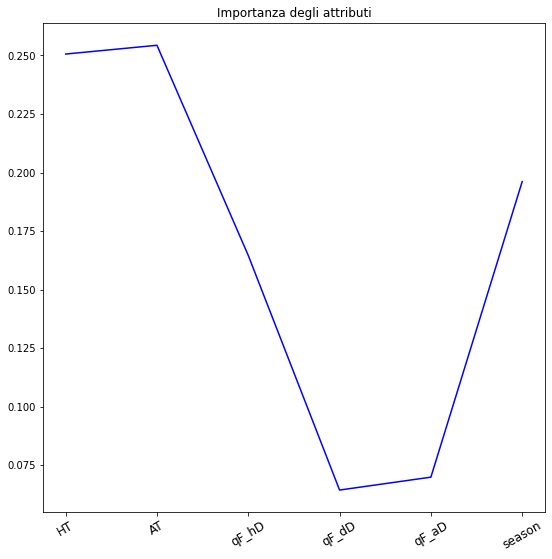

In [95]:
nameCol=training_set.columns
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9,9)
ax.plot(DTree_clf.feature_importances_,'b-')

ax.set_xticks([i for i in range(len(nameCol))])
xlabels = ax.set_xticklabels(nameCol,rotation=30, fontsize=12)
_=ax.set_title('Importanza degli attributi')

In [96]:
for name, score in zip(nameCol, DTree_clf.feature_importances_):
    print(name, score)

HT 0.25061286237894337
AT 0.25435406495533386
qF_hD 0.1645917969206349
qF_dD 0.06439467079785396
qF_aD 0.06990348512995315
season 0.19614311981728064


Ad eccezione della quota finale per la squadra di casa, abbiamo una significatività molto bassa. In effetti, è come pensavamo. La discretizzazione che abbiamo fatto non va bene perché raccoglie troppe quote diverse in un unico intervallo, quindi generalizziamo troppo. Per il momento, eliminiamo le quote discretizzate e manteniamo le quote normali. Vedremo in seguito se conviene apportare altre modifiche.

In [97]:
todrop = ['qF_hD', 'qF_aD', 'qF_dD']
dfn = dfn.drop(todrop, axis=1)

Vediamo se in effetti l'importanza degli attributi aumenta. Eliminiamo pmA e pmH che sono i punti ottenuti dalle squadre nel match corrente e categorizziamo gli id delle squadre:

In [98]:
todrop=['pmA', 'pmH']
dfn = dfn.drop(todrop,axis=1)

In [99]:
dfn.HT = dfn.HT.astype('category')
dfn.HT = dfn.HT.cat.codes
dfn.AT = dfn.AT.astype('category')
dfn.AT = dfn.AT.cat.codes

In [100]:
training_set, test_set = train_test_split(dfn, test_size=0.2, random_state=42)

In [101]:
training_label=training_set['OUTCOME'].copy()
training_set=training_set.drop("OUTCOME",axis=1)
test_label=test_set['OUTCOME'].copy()
test_set=test_set.drop('OUTCOME',axis=1)

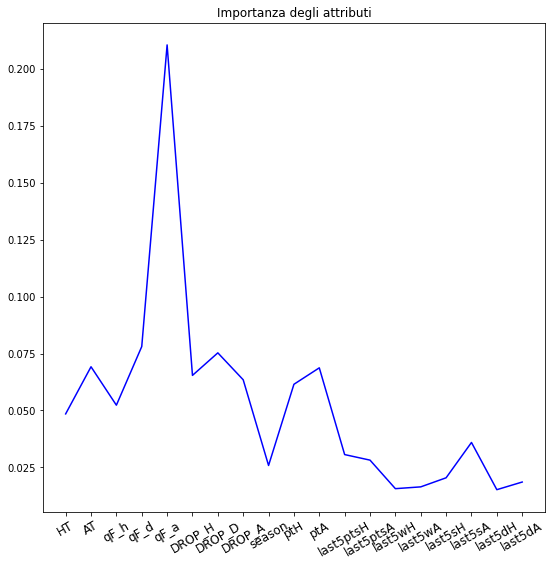

In [102]:
DTree_clf = DecisionTreeClassifier().fit(training_set, training_label)
nameCol=training_set.columns
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9,9)
ax.plot(DTree_clf.feature_importances_,'b-')

ax.set_xticks([i for i in range(len(nameCol))])
xlabels = ax.set_xticklabels(nameCol,rotation=30, fontsize=12)
_=ax.set_title('Importanza degli attributi')

In [103]:
for name, score in zip(nameCol, DTree_clf.feature_importances_):
    print(name, score)

HT 0.048499244553641956
AT 0.06918940371808073
qF_h 0.05232184478058138
qF_d 0.07805747861452608
qF_a 0.2104910521406558
DROP_H 0.06540879506359505
DROP_D 0.07529968485657532
DROP_A 0.06347913074261193
season 0.025854750318680605
ptH 0.06149902719219077
ptA 0.0687164101978202
last5ptsH 0.03063627192495393
last5ptsA 0.028199619532235452
last5wH 0.01567311529908825
last5wA 0.016460215891845726
last5sH 0.020444409283947782
last5sA 0.03595827934712745
last5dH 0.015227619365370869
last5dA 0.01858364717647068


La quota per l'X non ha cambiato la sua importanza, supponiamo quindi che in generale non sia un attributo fondamentale per la classificazione e che quindi l'X sia il risultato più difficile da predire. L'importanza di qF_a è di molto aumentata, mentre quella per l'1 è dimezzata. Riteniamo che questa situazione sia migliore della precedenza. Inoltre abbiamo visto che tutti gli attributi, anche quelli aggiunti da noi, hanno la loro importanza e daranno quindi un contributo significativo alla classificazione.

### Dataset finale

In [104]:
dfm = dfn.copy()

Verifichiamo ulteriormente la presenza di eventuali valori mancanti o infiniti

In [105]:
np.any(np.isnan(dfm))

False

In [106]:
np.all(np.isfinite(dfm))

True

Tutto ok.

In [107]:
dfm.head(10)

,HT,AT,qF_h,qF_d,qF_a,DROP_H,DROP_D,DROP_A,OUTCOME,season,ptH,ptA,last5ptsH,last5ptsA,last5wH,last5wA,last5sH,last5sA,last5dH,last5dA
0,10,28,1.97,3.31,4.74,-0.040609,0.030211,0.217300,1,0,0.0,0.0,0,0,0,0,0,0,0,0
1,14,20,1.36,5.03,11.65,0.044118,0.015905,0.119313,1,0,0.0,0.0,0,0,0,0,0,0,0,0
2,0,15,2.68,3.20,2.98,0.097015,0.012500,0.013423,2,0,0.0,0.0,0,0,0,0,0,0,0,0
3,7,2,2.04,3.25,4.45,-0.049020,0.043077,0.193258,1,0,0.0,0.0,0,0,0,0,0,0,0,0
4,12,3,2.64,3.14,3.10,0.238636,-0.025478,-0.238710,1,0,0.0,0.0,0,0,0,0,0,0,0,0
5,17,23,1.51,4.15,8.50,0.072848,-0.043373,0.034118,2,0,0.0,0.0,0,0,0,0,0,0,0,0
6,19,18,3.24,3.42,2.39,0.083333,0.058480,0.000000,2,0,0.0,0.0,0,0,0,0,0,0,0,0
7,21,13,3.99,3.32,2.15,-0.120301,-0.045181,0.162791,2,0,0.0,0.0,0,0,0,0,0,0,0,0
8,22,5,1.47,4.65,8.00,0.047619,0.053763,0.010000,0,0,0.0,0.0,0,0,0,0,0,0,0,0
9,25,27,2.44,3.13,3.45,0.073770,0.000000,0.043478,0,0,0.0,0.0,0,0,0,0,0,0,0,0


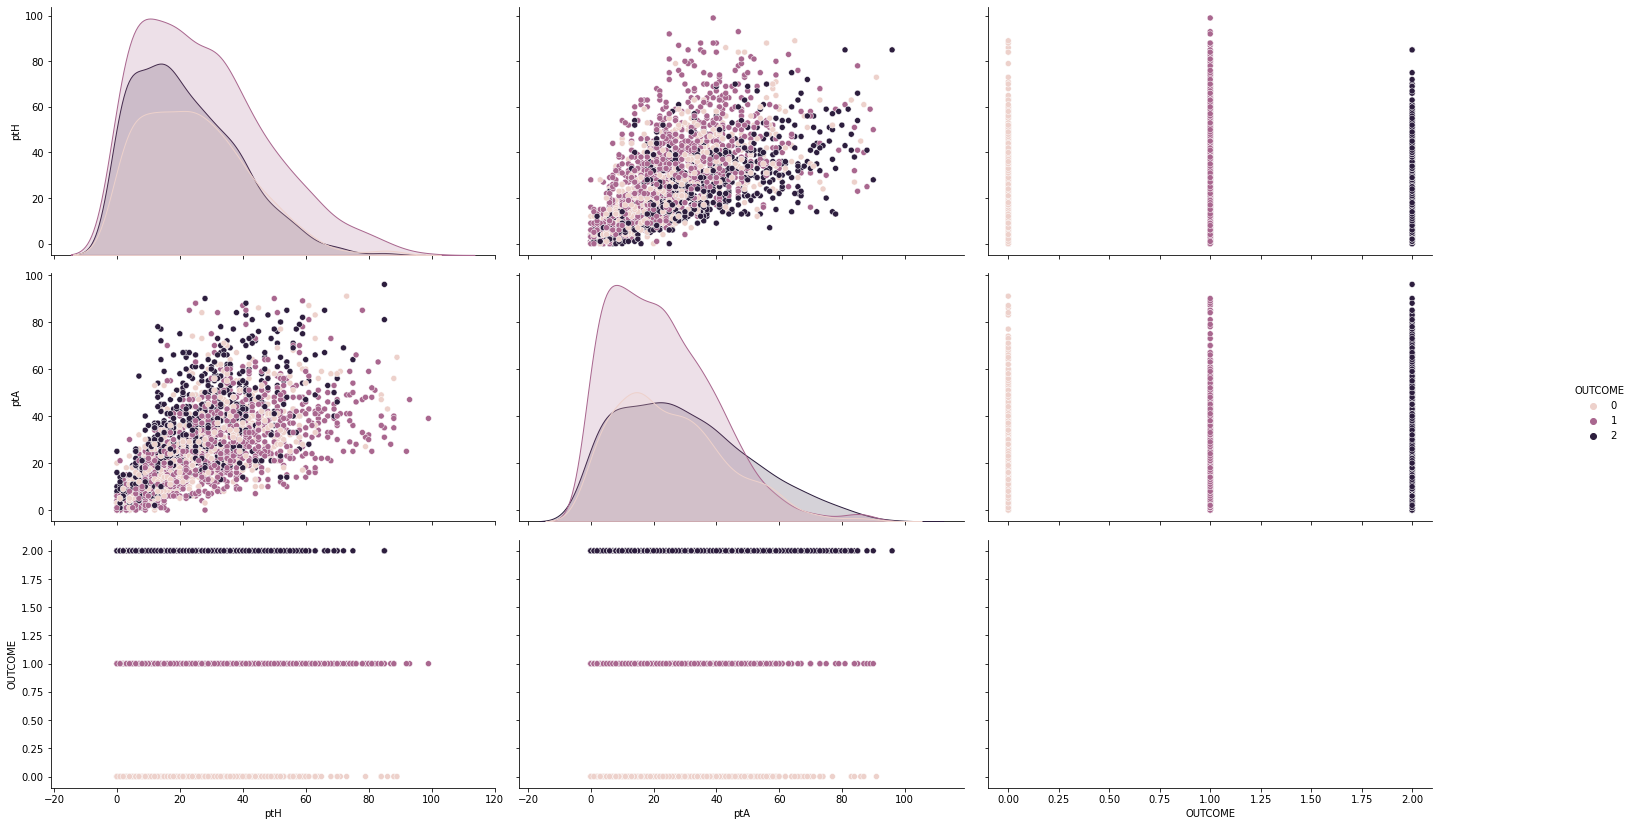

In [108]:
attributes = ['ptH', 'ptA', 'OUTCOME']

g= sns.pairplot(dfn,
                 x_vars = attributes,
                 y_vars = attributes,
                 hue='OUTCOME',
                 diag_kind='kde',
                 diag_kws={'alpha':0.2},
               )
g.fig.set_size_inches(24,12)

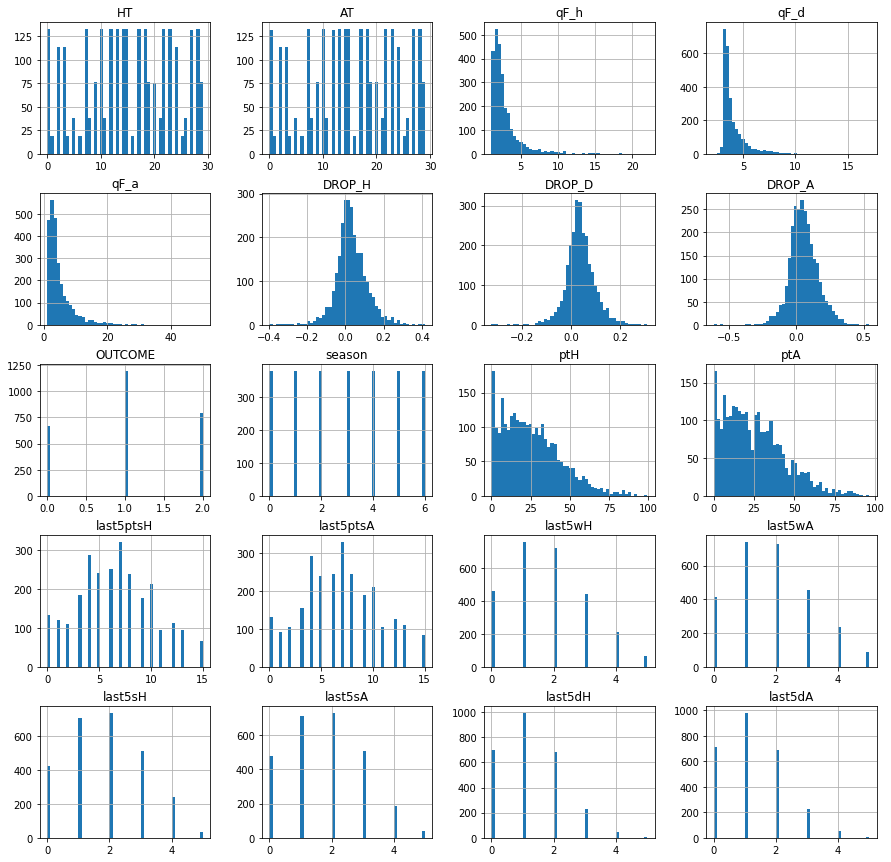

In [109]:
#vediamo come sono distribuiti gli attributi
dfm.hist(bins = 50, figsize = (15,15) )
plt.show()

---